# Предсказание ранней повторной госпитализации
Задания:

0. Описать задачу словами
1. Прочитать данные
2. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать.
3. Обработать пропущенные значения (или убедиться, что их нет)
4. Обработать категориальные признаки
5. Провести нормализацию (или объяснить, почему в вашем случае она не нужна)
6. Разбить данные на обучающую и тестовую выборки
7. Запустить классификатор (регрессию) ближайших соседей или другой (аргументировать свой выбор)
8. Подобрать оптимальное значение к-ва ближайших соседей (или другого релевантного гиперпараметра) 9. Вычислить ошибки на обучающей и тестовой выборках. Сделать выводы
9. По желанию: запустить другие классификаторы. Сравнить результаты
10. По желанию: как-то побороться с несбалансированностью классов (если она есть)
11. По желанию: исключить коррелированные переменные (объяснить зачем)
12. Сделать общие выводы

# Описание задачи

Задача заключается в прогнозировании повторной госпитализации пациента на основе данных о диабете.

Датасет [_Diabetes 130-US hospitals for years 1999-2008 Data Set_](https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008#) представляет информацию о клинической помощи, оказанной в течение 10 лет в 130 больницах США. Он содержит 50 характеристик, описывающих данные о больницах и результаты лечения пациентов.

Показатели ранней повторной госпитализации могут служить важным показателем качества лекарственной терапии и систем здравоохранения в целом. Частая повторная госпитализация обычно указывает на неэффективность применяемых лекарственных препаратов и методов лечения.

Цель данного проекта заключается в разработке модели, способной предсказывать вероятность ранней повторной госпитализации (в течение месяца). 

## входные признаки

### Числовые признаки:
    encounter_id - уникальный идентификатор приема
    patient_nbr - уникальный идентификатор пациента
    time_in_hospital - число дней между поступлением и выпиской
    num_lab_procedures - количество лабораторных тестов, проведенных во время приема
    num_procedures - количество процедур (кроме лабораторных тестов), проведенных во время приема
    num_medications - количество препаратов, назначенных во время приема
    number_outpatient - количество амбулаторных посещений пациента за год, предшествующий приему
    number_emergency - количество экстренных посещений пациента за год, предшествующий приему
    number_inpatient - количество стационарных посещений пациента за год, предшествующий приему
    number_diagnoses - количество диагнозов, введенных в систему
    
### категориальные признаки
    race - расовая принадлежность (принимаемые значения: Caucasian, Asian, African American, Hispanic, and other)
    gender - пол (принимаемые значения: male, female, unknown/invalid)
    age - возраст (значения сгруппированы с интервалом в 10 лет: [0-10), [10-20), ..., [90-100))
    weight - вес в фунтах (значения сгруппированы с интервалом в 25 фунтов: [0-25), ... [175-200), >200)
    admission_type - тип посещения (принимает 9 различных значений, например, emergency, urgent, elective, newborn и др.)
    discharge_disposition - расположение пациента на момент выписки (принимает 29 различных значений, например, discharged to home, expired и др.)
    admission_source - источник обращения (принимает 21 различное значение, например, physician referral, emergency room и др.)
    payer_code - код плательщика, покрывающего медицинские расходы (соответствует 23 различным значениям, например, Medicare, self-pay и др.)
    medical_specialty - медицинская специальность принимающего врача (соответствует 84 различным значениям, например, cardiology, surgeon и др.)
    diag_1 - первичный диагноз (кодируется первыми тремя цифрами МКБ9 и принимает 848 различных значений)
    diag_2 - вторичный диагноз (кодируется первыми тремя цифрами МКБ9 и принимает 923 различных значения)
    diag_3 - дополнительный вторичный диагноз (кодируется первыми тремя цифрами МКБ9 и принимает 954 различных значения)
    max_glu_serum - диапазон результата теста на глюкозу в сыворотке крови (значения: None, >200, >300, Norm)
    A1Cresult - диапазон результата теста A1C (тест на гемоглобин) (значения: None, >7, >8, Norm)
    change - признак, показывающий было ли изменение лекарств от диабета (либо дозировки, либо препарата) (значения: change, no change)
    diabetesMed - признак, показывающий были ли назначены лекарства от диабета (значения: yes, no)
    metformin, ..., metformin-pioglitazone - 24 признака, показывающих был ли назначен соответствующий препарат или произошло ли изменение дозировки (значения: up (если увеличили дозировку), down (если уменьшили дозировку), steady (если дозировку не меняли), no (если препарат не был назначен))
    
### выходной признак
    readmitted - категориальный признак, показывающий число дней до повторной госпитализации в стационар (принимаемые значения: <30_ (если пациент был повторно госпитализирован менее чем за 30 дней), _>30 (если пациент был повторно госпитализирован более чем за 30 дней), No (для отсутствия записи о повторной госпитализации))

# прочтем данные

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
!pip install category_encoders
import category_encoders as ce  # библиотека для кодирования категориальных признаков
import matplotlib.pyplot as plt
%matplotlib inline


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
url = 'https://raw.githubusercontent.com/Falirchik/ML/main/diabetic_data.csv'
df = pd.read_csv(url, low_memory=False)

df.shape

(101766, 50)

Датасет состоит из 101766 записей и 50 признаков.

Отобразим записи в виде таблицы. Отобразим лишь часть (первые 10 записей), для удобства восприятия (ввиду большого количества признаков) транспонируем эту таблицу.

In [3]:
df.head(10).T

0                   1  \
encounter_id                               2278392              149190   
patient_nbr                                8222157            55629189   
race                                     Caucasian           Caucasian   
gender                                      Female              Female   
age                                         [0-10)             [10-20)   
weight                                         NaN                 NaN   
admission_type                                 NaN           Emergency   
discharge_disposition                   Not Mapped  Discharged to home   
admission_source                Physician Referral      Emergency Room   
time_in_hospital                                 1                   3   
payer_code                                     NaN                 NaN   
medical_specialty         Pediatrics-Endocrinology                 NaN   
num_lab_procedures                              41                  59   
num_procedures                                   0                   0   
num_medications                                  1                  18   
number_outpatient                                0                   0   
number_emergency                                 0                   0   
number_inpatient                                 0                   0   
diag_1                                      250.83                 276   
diag_2                                         NaN              250.01   
diag_3                                         NaN                 255   
number_diagnoses                                 1                   9   
max_glu_serum                                  NaN                 NaN   
A1Cresult                                      NaN                 NaN   
metformin                                       No                  No   
repaglinide                                     No                  No   
nateglinide                                     No                  No   
chlorpropamide                                  No                  No   
glimepiride                                     No                  No   
acetohexamide                                   No                  No   
glipizide                                       No                  No   
glyburide                                       No                  No   
tolbutamide                                     No                  No   
pioglitazone                                    No                  No   
rosiglitazone                                   No                  No   
acarbose                                        No                  No   
miglitol                                        No                  No   
troglitazone                                    No                  No   
tolazamide                                      No                  No   
examide                                         No                  No   
citoglipton                                     No                  No   
insulin                                         No                  Up   
glyburide-metformin                             No                  No   
glipizide-metformin                             No                  No   
glimepiride-pioglitazone                        No                  No   
metformin-rosiglitazone                         No                  No   
metformin-pioglitazone                          No                  No   
change                                          No                  Ch   
diabetesMed                                     No                 Yes   
readmitted                                      NO                 >30   

                                           2                   3  \
encounter_id                           64410              500364   
patient_nbr                         86047875            82442376   
race                         AfricanAmerican           Caucasian   
ge

Данные состоят из числовых и категориальных признаков. Имеются пропущенные значения. 
Проведем дополнительную предобработку данных.
# список признаков

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type            96475 non-null   object
 7   discharge_disposition     98075 non-null   object
 8   admission_source          94985 non-null   object
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
for column in df.select_dtypes(['object']):
    df[column] = df[column].astype('category')

df.dtypes

encounter_id                   int64
patient_nbr                    int64
race                        category
gender                      category
age                         category
weight                      category
admission_type              category
discharge_disposition       category
admission_source            category
time_in_hospital               int64
payer_code                  category
medical_specialty           category
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
number_outpatient              int64
number_emergency               int64
number_inpatient               int64
diag_1                      category
diag_2                      category
diag_3                      category
number_diagnoses               int64
max_glu_serum               category
A1Cresult                   category
metformin                   category
repaglinide                 category
nateglinide                 category
c

# Описание задачи

Предсказание ранней повторной госпитализации. Признак readmitted показывает число дней до повторной госпитализации. Т.к. в данной задаче важна именно ранняя госпитализация, то можно объединить значения >30 и No в единое значение и заменить его на NO, а значение <30 - на YES, тем самым сведя задачу к бинарной классификации.

In [6]:
df['readmitted'].unique()  # число уникальных значений признака readmitted

['NO', '>30', '<30']
Categories (3, object): ['<30', '>30', 'NO']

In [7]:
df['readmitted'] = df['readmitted'].replace('<30', 'YES').replace('>30', 'NO')

df['readmitted'].unique()

['NO', 'YES']
Categories (2, object): ['YES', 'NO']

In [8]:
df.head(10).T

0                   1  \
encounter_id                               2278392              149190   
patient_nbr                                8222157            55629189   
race                                     Caucasian           Caucasian   
gender                                      Female              Female   
age                                         [0-10)             [10-20)   
weight                                         NaN                 NaN   
admission_type                                 NaN           Emergency   
discharge_disposition                   Not Mapped  Discharged to home   
admission_source                Physician Referral      Emergency Room   
time_in_hospital                                 1                   3   
payer_code                                     NaN                 NaN   
medical_specialty         Pediatrics-Endocrinology                 NaN   
num_lab_procedures                              41                  59   
num_procedures                                   0                   0   
num_medications                                  1                  18   
number_outpatient                                0                   0   
number_emergency                                 0                   0   
number_inpatient                                 0                   0   
diag_1                                      250.83                 276   
diag_2                                         NaN              250.01   
diag_3                                         NaN                 255   
number_diagnoses                                 1                   9   
max_glu_serum                                  NaN                 NaN   
A1Cresult                                      NaN                 NaN   
metformin                                       No                  No   
repaglinide                                     No                  No   
nateglinide                                     No                  No   
chlorpropamide                                  No                  No   
glimepiride                                     No                  No   
acetohexamide                                   No                  No   
glipizide                                       No                  No   
glyburide                                       No                  No   
tolbutamide                                     No                  No   
pioglitazone                                    No                  No   
rosiglitazone                                   No                  No   
acarbose                                        No                  No   
miglitol                                        No                  No   
troglitazone                                    No                  No   
tolazamide                                      No                  No   
examide                                         No                  No   
citoglipton                                     No                  No   
insulin                                         No                  Up   
glyburide-metformin                             No                  No   
glipizide-metformin                             No                  No   
glimepiride-pioglitazone                        No                  No   
metformin-rosiglitazone                         No                  No   
metformin-pioglitazone                          No                  No   
change                                          No                  Ch   
diabetesMed                                     No                 Yes   
readmitted                                      NO                  NO   

                                           2                   3  \
encounter_id                           64410              500364   
patient_nbr                         86047875            82442376   
race                         AfricanAmerican           Caucasian   
ge

# визуализация и предварительный анализ
Избавимся от идентификаторов пациента и приема, потому что в нашей задаче они не имеют смысла

In [9]:
df.drop(['patient_nbr', 'encounter_id'], axis=1, inplace=True)

df.shape

(101766, 48)

# статистика матрицы данных
## инфорамция о категориальных признаках


In [10]:
df.describe(include=['category']).T

count unique                 top    freq
race                       99493      5           Caucasian   76099
gender                    101766      3              Female   54708
age                       101766     10             [70-80)   26068
weight                      3197      9            [75-100)    1336
admission_type             96475      7           Emergency   53990
discharge_disposition      98075     25  Discharged to home   60234
admission_source           94985     16      Emergency Room   57494
payer_code                 61510     17                  MC   32439
medical_specialty          51817     72    InternalMedicine   14635
diag_1                    101745    716                 428    6862
diag_2                    101408    748                 276    6752
diag_3                    100343    789                 250   11555
max_glu_serum               5346      3                Norm    2597
A1Cresult                  17018      3                  >8    8216
metformin                 101766      4                  No   81778
repaglinide               101766      4                  No  100227
nateglinide               101766      4                  No  101063
chlorpropamide            101766      4                  No  101680
glimepiride               101766      4                  No   96575
acetohexamide             101766      2                  No  101765
glipizide                 101766      4                  No   89080
glyburide                 101766      4                  No   91116
tolbutamide               101766      2                  No  101743
pioglitazone              101766      4                  No   94438
rosiglitazone             101766      4                  No   95401
acarbose                  101766      4                  No  101458
miglitol                  101766      4                  No  101728
troglitazone              101766      2                  No  101763
tolazamide                101766      3                  No  101727
examide                   101766      1                  No  101766
citoglipton               101766      1                  No  101766
insulin                   101766      4                  No   47383
glyburide-metformin       101766      4                  No  101060
glipizide-metformin       101766      2                  No  101753
glimepiride-pioglitazone  101766      2                  No  101765
metformin-rosiglitazone   101766      2                  No  101764
metformin-pioglitazone    101766      2                  No  101765
change                    101766      2                  No   54755
diabetesMed               101766      2                 Yes   78363
readmitted                101766      2                  NO   90409

Видим два признака, что принимают уникальное значение: examide, citoglipton. Так как у них единственное значение, то можем их убрать, они не будут никак влиять на задачу.

In [11]:
df.drop(['examide', 'citoglipton'], axis=1, inplace=True)

df.shape

(101766, 46)

# числовые признаки

In [12]:
df.describe(include = "all").T

count unique                 top    freq  \
race                         99493      5           Caucasian   76099   
gender                      101766      3              Female   54708   
age                         101766     10             [70-80)   26068   
weight                        3197      9            [75-100)    1336   
admission_type               96475      7           Emergency   53990   
discharge_disposition        98075     25  Discharged to home   60234   
admission_source             94985     16      Emergency Room   57494   
time_in_hospital          101766.0    NaN                 NaN     NaN   
payer_code                   61510     17                  MC   32439   
medical_specialty            51817     72    InternalMedicine   14635   
num_lab_procedures        101766.0    NaN                 NaN     NaN   
num_procedures            101766.0    NaN                 NaN     NaN   
num_medications           101766.0    NaN                 NaN     NaN   
number_outpatient         101766.0    NaN                 NaN     NaN   
number_emergency          101766.0    NaN                 NaN     NaN   
number_inpatient          101766.0    NaN                 NaN     NaN   
diag_1                      101745    716                 428    6862   
diag_2                      101408    748                 276    6752   
diag_3                      100343    789                 250   11555   
number_diagnoses          101766.0    NaN                 NaN     NaN   
max_glu_serum                 5346      3                Norm    2597   
A1Cresult                    17018      3                  >8    8216   
metformin                   101766      4                  No   81778   
repaglinide                 101766      4                  No  100227   
nateglinide                 101766      4                  No  101063   
chlorpropamide              101766      4                  No  101680   
glimepiride                 101766      4                  No   96575   
acetohexamide               101766      2                  No  101765   
glipizide                   101766      4                  No   89080   
glyburide                   101766      4                  No   91116   
tolbutamide                 101766      2                  No  101743   
pioglitazone                101766      4                  No   94438   
rosiglitazone               101766      4                  No   95401   
acarbose                    101766      4                  No  101458   
miglitol                    101766      4                  No  101728   
troglitazone                101766      2                  No  101763   
tolazamide                  101766      3                  No  101727   
insulin                     101766      4                  No   47383   
glyburide-metformin         101766      4                  No  101060   
glipizide-metformin         101766      2                  No  101753   
glimepiride-pioglitazone    101766      2                  No  101765   
metformin-rosiglitazone     101766      2                  No  101764   
metformin-pioglitazone      101766      2                  No  101765   
change                      101766      2                  No   54755   
diabetesMed                 101766      2                 Yes   78363   
readmitted                  101766      2                  NO   90409   

                               mean        std  min   25%   50%   75%    max  
race                            NaN        NaN  NaN   NaN   NaN   NaN    NaN  
gender                          NaN        NaN  NaN   NaN   NaN   NaN    NaN  
age                             NaN        NaN  NaN   NaN   NaN   NaN    NaN  
weight                          NaN        NaN  NaN   NaN   NaN   NaN    NaN  
admission_type                  NaN        NaN  NaN   NaN   NaN   NaN    NaN  
discharge_disposition           NaN        NaN  NaN   NaN   NaN   NaN    NaN  
admission_source                NaN        N

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 46 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   race                      99493 non-null   category
 1   gender                    101766 non-null  category
 2   age                       101766 non-null  category
 3   weight                    3197 non-null    category
 4   admission_type            96475 non-null   category
 5   discharge_disposition     98075 non-null   category
 6   admission_source          94985 non-null   category
 7   time_in_hospital          101766 non-null  int64   
 8   payer_code                61510 non-null   category
 9   medical_specialty         51817 non-null   category
 10  num_lab_procedures        101766 non-null  int64   
 11  num_procedures            101766 non-null  int64   
 12  num_medications           101766 non-null  int64   
 13  number_outpatient         101

In [14]:
missing_data = df.isnull()
missing_data.head(10).T

0      1      2      3      4      5      6  \
race                      False  False  False  False  False  False  False   
gender                    False  False  False  False  False  False  False   
age                       False  False  False  False  False  False  False   
weight                     True   True   True   True   True   True   True   
admission_type             True  False  False  False  False  False  False   
discharge_disposition     False  False  False  False  False  False  False   
admission_source          False  False  False  False  False  False  False   
time_in_hospital          False  False  False  False  False  False  False   
payer_code                 True   True   True   True   True   True   True   
medical_specialty         False   True   True   True   True   True   True   
num_lab_procedures        False  False  False  False  False  False  False   
num_procedures            False  False  False  False  False  False  False   
num_medications           False  False  False  False  False  False  False   
number_outpatient         False  False  False  False  False  False  False   
number_emergency          False  False  False  False  False  False  False   
number_inpatient          False  False  False  False  False  False  False   
diag_1                    False  False  False  False  False  False  False   
diag_2                     True  False  False  False  False  False  False   
diag_3                     True  False  False  False  False  False  False   
number_diagnoses          False  False  False  False  False  False  False   
max_glu_serum              True   True   True   True   True   True   True   
A1Cresult                  True   True   True   True   True   True   True   
metformin                 False  False  False  False  False  False  False   
repaglinide               False  False  False  False  False  False  False   
nateglinide               False  False  False  False  False  False  False   
chlorpropamide            False  False  False  False  False  False  False   
glimepiride               False  False  False  False  False  False  False   
acetohexamide             False  False  False  False  False  False  False   
glipizide                 False  False  False  False  False  False  False   
glyburide                 False  False  False  False  False  False  False   
tolbutamide               False  False  False  False  False  False  False   
pioglitazone              False  False  False  False  False  False  False   
rosiglitazone             False  False  False  False  False  False  False   
acarbose                  False  False  False  False  False  False  False   
miglitol                  False  False  False  False  False  False  False   
troglitazone              False  False  False  False  False  False  False   
tolazamide                False  False  False  False  False  False  False   
insulin                   False  False  False  False  False  False  False   
glyburide-metformin       False  False  False  False  False  False  False   
glipizide-metformin       False  False  False  False  False  False  False   
glimepiride-pioglitazone  False  False  False  False  False  False  False   
metformin-rosiglitazone   False  False  False  False  False  False  False   
metformin-pioglitazone    False  False  False  False  False  False  False   
change                    False  False  False  False  False  False  False   
diabetesMed               False  False  False  False  False  False  False   
readmitted                False  False  False  False  False  False  False   

                              7      8      9  
race                      False  False  False  
gender                    False  False  False  
age                       False  False  False  
weight                     True   True   True  
admission_type            False  False  False  
discharge_disposition     False  False  False  
admission_source          False  False  False  
time_in_hospital          

True - представляет собой отсутвующее значение в каждом из столбцов. Подсчитаем их.


In [15]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print(" ")

race
race
False    99493
True      2273
Name: count, dtype: int64
 
gender
gender
False    101766
Name: count, dtype: int64
 
age
age
False    101766
Name: count, dtype: int64
 
weight
weight
True     98569
False     3197
Name: count, dtype: int64
 
admission_type
admission_type
False    96475
True      5291
Name: count, dtype: int64
 
discharge_disposition
discharge_disposition
False    98075
True      3691
Name: count, dtype: int64
 
admission_source
admission_source
False    94985
True      6781
Name: count, dtype: int64
 
time_in_hospital
time_in_hospital
False    101766
Name: count, dtype: int64
 
payer_code
payer_code
False    61510
True     40256
Name: count, dtype: int64
 
medical_specialty
medical_specialty
False    51817
True     49949
Name: count, dtype: int64
 
num_lab_procedures
num_lab_procedures
False    101766
Name: count, dtype: int64
 
num_procedures
num_procedures
False    101766
Name: count, dtype: int64
 
num_medications
num_medications
False    101766
Name: count,

In [16]:
df.isnull().sum()

race                         2273
gender                          0
age                             0
weight                      98569
admission_type               5291
discharge_disposition        3691
admission_source             6781
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide     

По таблице заметно отсутствие каких-либо выбивающихся значений.

Рассмотрим сбалансированность/несбалансированность классов.

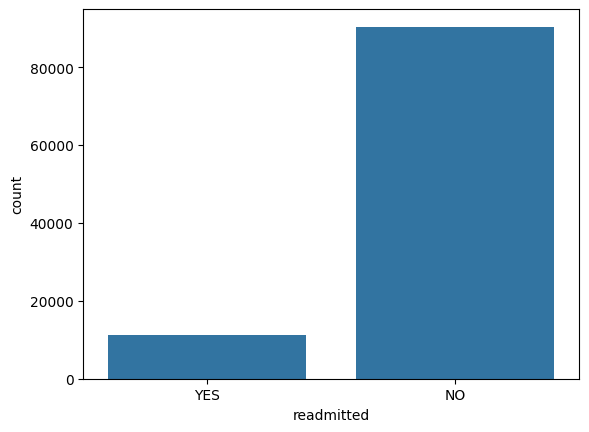

In [17]:
sns.countplot(x='readmitted', data=df)
pass

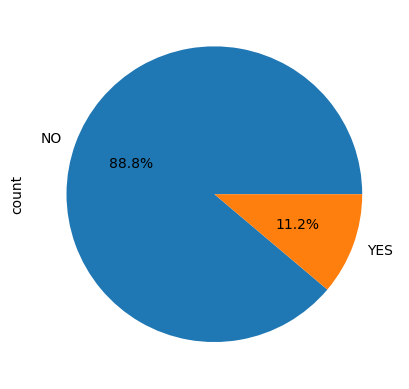

In [18]:
df['readmitted'].value_counts()/len(df)
counts = df['readmitted'].value_counts()

percentages = counts * 100 / len(df)

fig, ax = plt.subplots()
percentages.plot(kind='pie', ax=ax, autopct='%1.1f%%')
plt.show()

Очевидно, что классы несбалансированы. В дальнейшем стоит попытаться устранить эту несбалансированность.

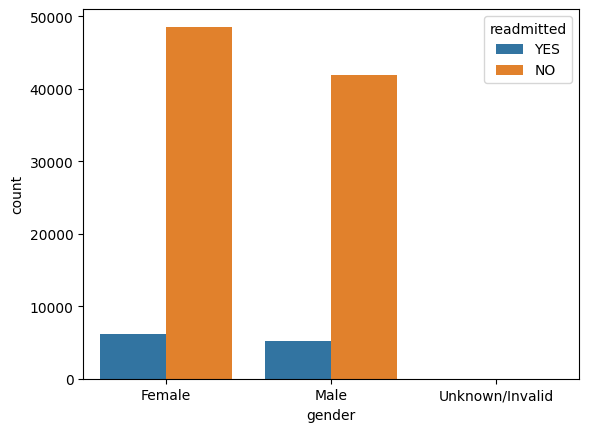

In [19]:
sns.countplot(x='gender', order=df['gender'].value_counts().index, hue='readmitted', data=df)
pass

In [20]:
rows_with_invalid_gender = df[df['gender'] == 'Unknown/Invalid']  # строки с невалидными значениями признака gender

len(rows_with_invalid_gender)  # число таких строк

3

В датасете очевидно видно преобладание женщин. так же имеется 3 записи с невалидным значением. так как этих записей всего 3, то мы можем их удалить


In [21]:
df.drop(rows_with_invalid_gender.index, axis=0, inplace=True)

len(df[df['gender'] == 'Unknown/Invalid'])  # число строк с невалидными значениями признака gender после удаления

0

Рассмотрим возраст повторногоспитализируемых


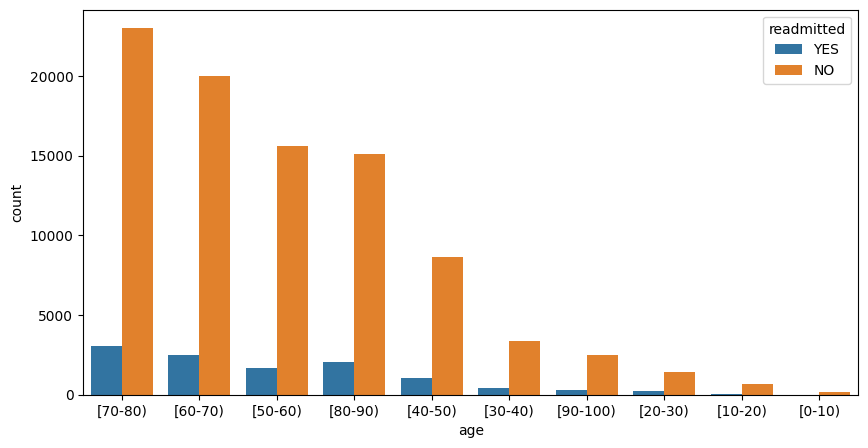

In [22]:
plt.figure(figsize=(10, 5))
sns.countplot(x='age', order=df['age'].value_counts().index, hue='readmitted', data=df)
pass

Пожилые - наиболее частая группа пациентов, независимо от того, был ли пациент повторногоспитализирован.

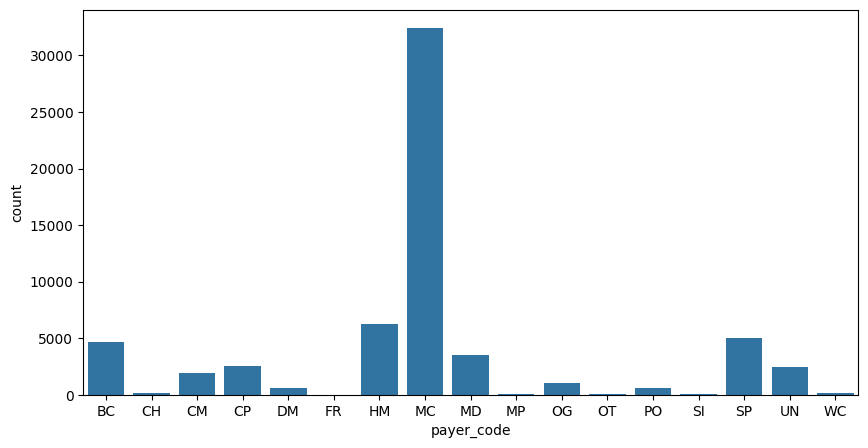

In [23]:
plt.figure(figsize=(10, 5))
sns.countplot(x='payer_code', data=df)
pass

Самый популярный способ оплаты медуслуг - MC (медицинская страховка для лиц от 65 лет и старше)

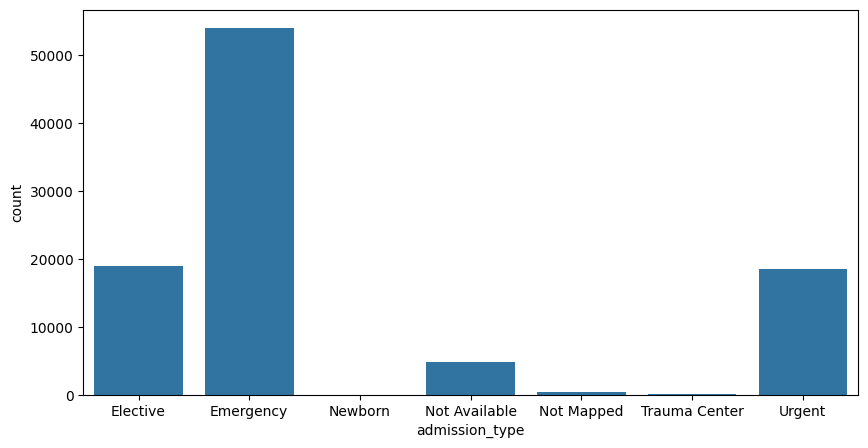

In [24]:
plt.figure(figsize=(10, 5))
sns.countplot(x='admission_type', data=df)
pass

Наибольшее число обращений - неотложные.

In [25]:
df['A1Cresult_NaN'] = np.where(df['A1Cresult'].isnull(), 0,1)
df['max_glu_serum_NaN'] = np.where(df['max_glu_serum'].isnull(), 0,1)
df.head(10).T

0                   1  \
race                                     Caucasian           Caucasian   
gender                                      Female              Female   
age                                         [0-10)             [10-20)   
weight                                         NaN                 NaN   
admission_type                                 NaN           Emergency   
discharge_disposition                   Not Mapped  Discharged to home   
admission_source                Physician Referral      Emergency Room   
time_in_hospital                                 1                   3   
payer_code                                     NaN                 NaN   
medical_specialty         Pediatrics-Endocrinology                 NaN   
num_lab_procedures                              41                  59   
num_procedures                                   0                   0   
num_medications                                  1                  18   
number_outpatient                                0                   0   
number_emergency                                 0                   0   
number_inpatient                                 0                   0   
diag_1                                      250.83                 276   
diag_2                                         NaN              250.01   
diag_3                                         NaN                 255   
number_diagnoses                                 1                   9   
max_glu_serum                                  NaN                 NaN   
A1Cresult                                      NaN                 NaN   
metformin                                       No                  No   
repaglinide                                     No                  No   
nateglinide                                     No                  No   
chlorpropamide                                  No                  No   
glimepiride                                     No                  No   
acetohexamide                                   No                  No   
glipizide                                       No                  No   
glyburide                                       No                  No   
tolbutamide                                     No                  No   
pioglitazone                                    No                  No   
rosiglitazone                                   No                  No   
acarbose                                        No                  No   
miglitol                                        No                  No   
troglitazone                                    No                  No   
tolazamide                                      No                  No   
insulin                                         No                  Up   
glyburide-metformin                             No                  No   
glipizide-metformin                             No                  No   
glimepiride-pioglitazone                        No                  No   
metformin-rosiglitazone                         No                  No   
metformin-pioglitazone                          No                  No   
change                                          No                  Ch   
diabetesMed                                     No                 Yes   
readmitted                                      NO                  NO   
A1Cresult_NaN                                    0                   0   
max_glu_serum_NaN                                0                   0   

                                           2                   3  \
race                         AfricanAmerican           Caucasian   
gender                                Female                Male   
age                                  [20-30)             [30-40)   
weight                                   NaN                 NaN   
admission_type                     Emergency           Emergency   
discharge_disp

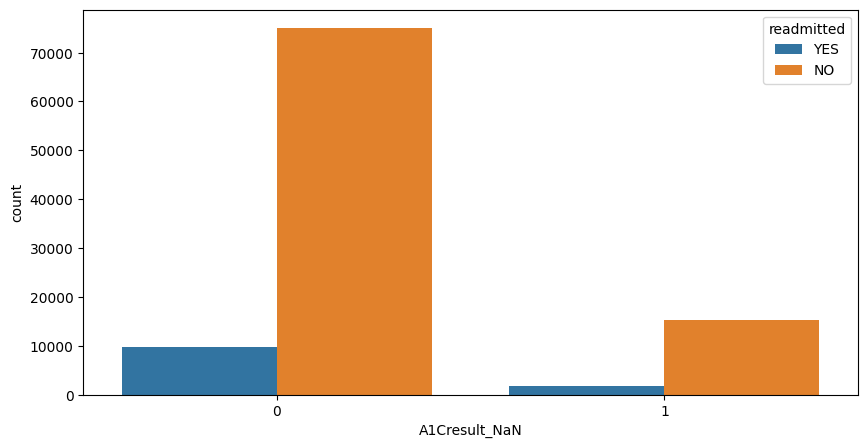

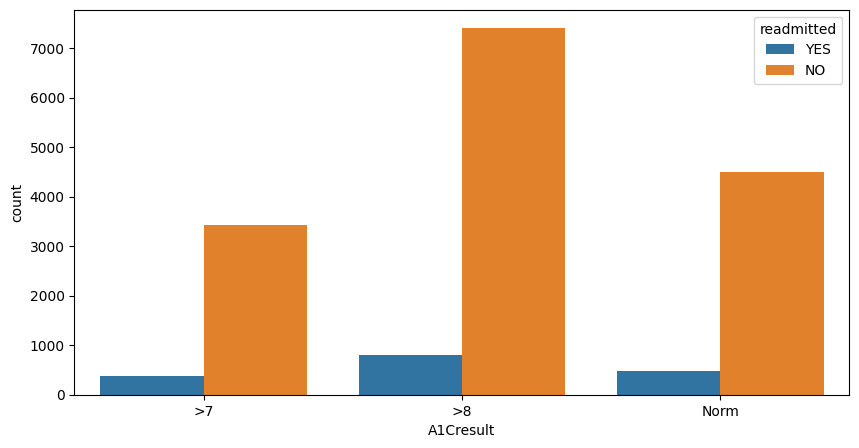

In [26]:
plt.figure(figsize=(10, 5))
sns.countplot(x='A1Cresult_NaN', hue='readmitted', data=df)
pass

plt.figure(figsize=(10, 5))
sns.countplot(x='A1Cresult', hue='readmitted', data=df)
pass

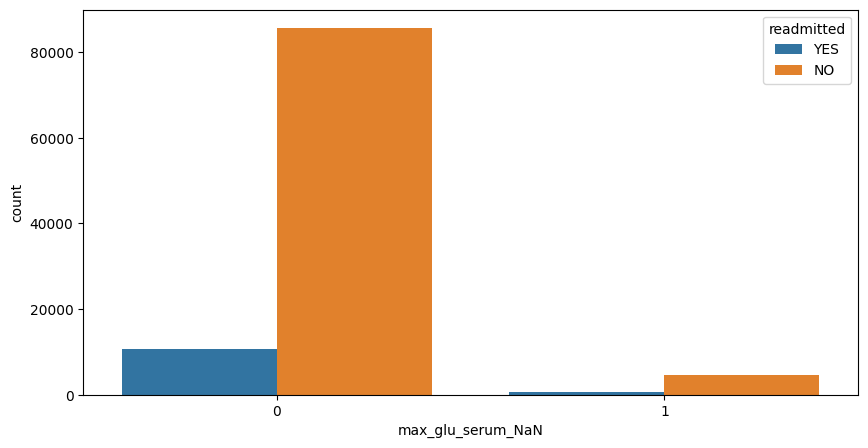

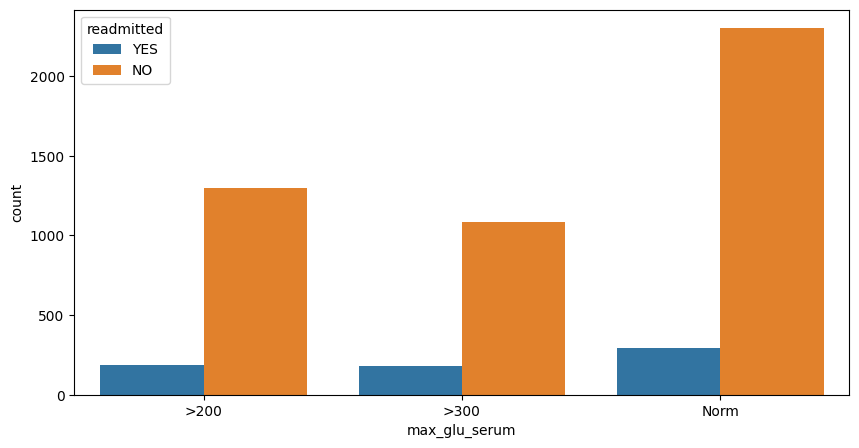

In [27]:
plt.figure(figsize=(10, 5))
sns.countplot(x='max_glu_serum_NaN', hue='readmitted', data=df)
pass

plt.figure(figsize=(10, 5))
sns.countplot(x='max_glu_serum', hue='readmitted', data=df)
pass

Подавляющему большинству пациентов не делали тесты ни на гемоглобин (А1С), ни на глюкозу. Удалим признаки, которые специально добавили для этих графиков.

In [28]:
df.drop(['max_glu_serum_NaN', 'A1Cresult_NaN'], axis=1, inplace=True)

df.shape

(101763, 46)

Построим графики зависимостей каждого количественного признака с каждым

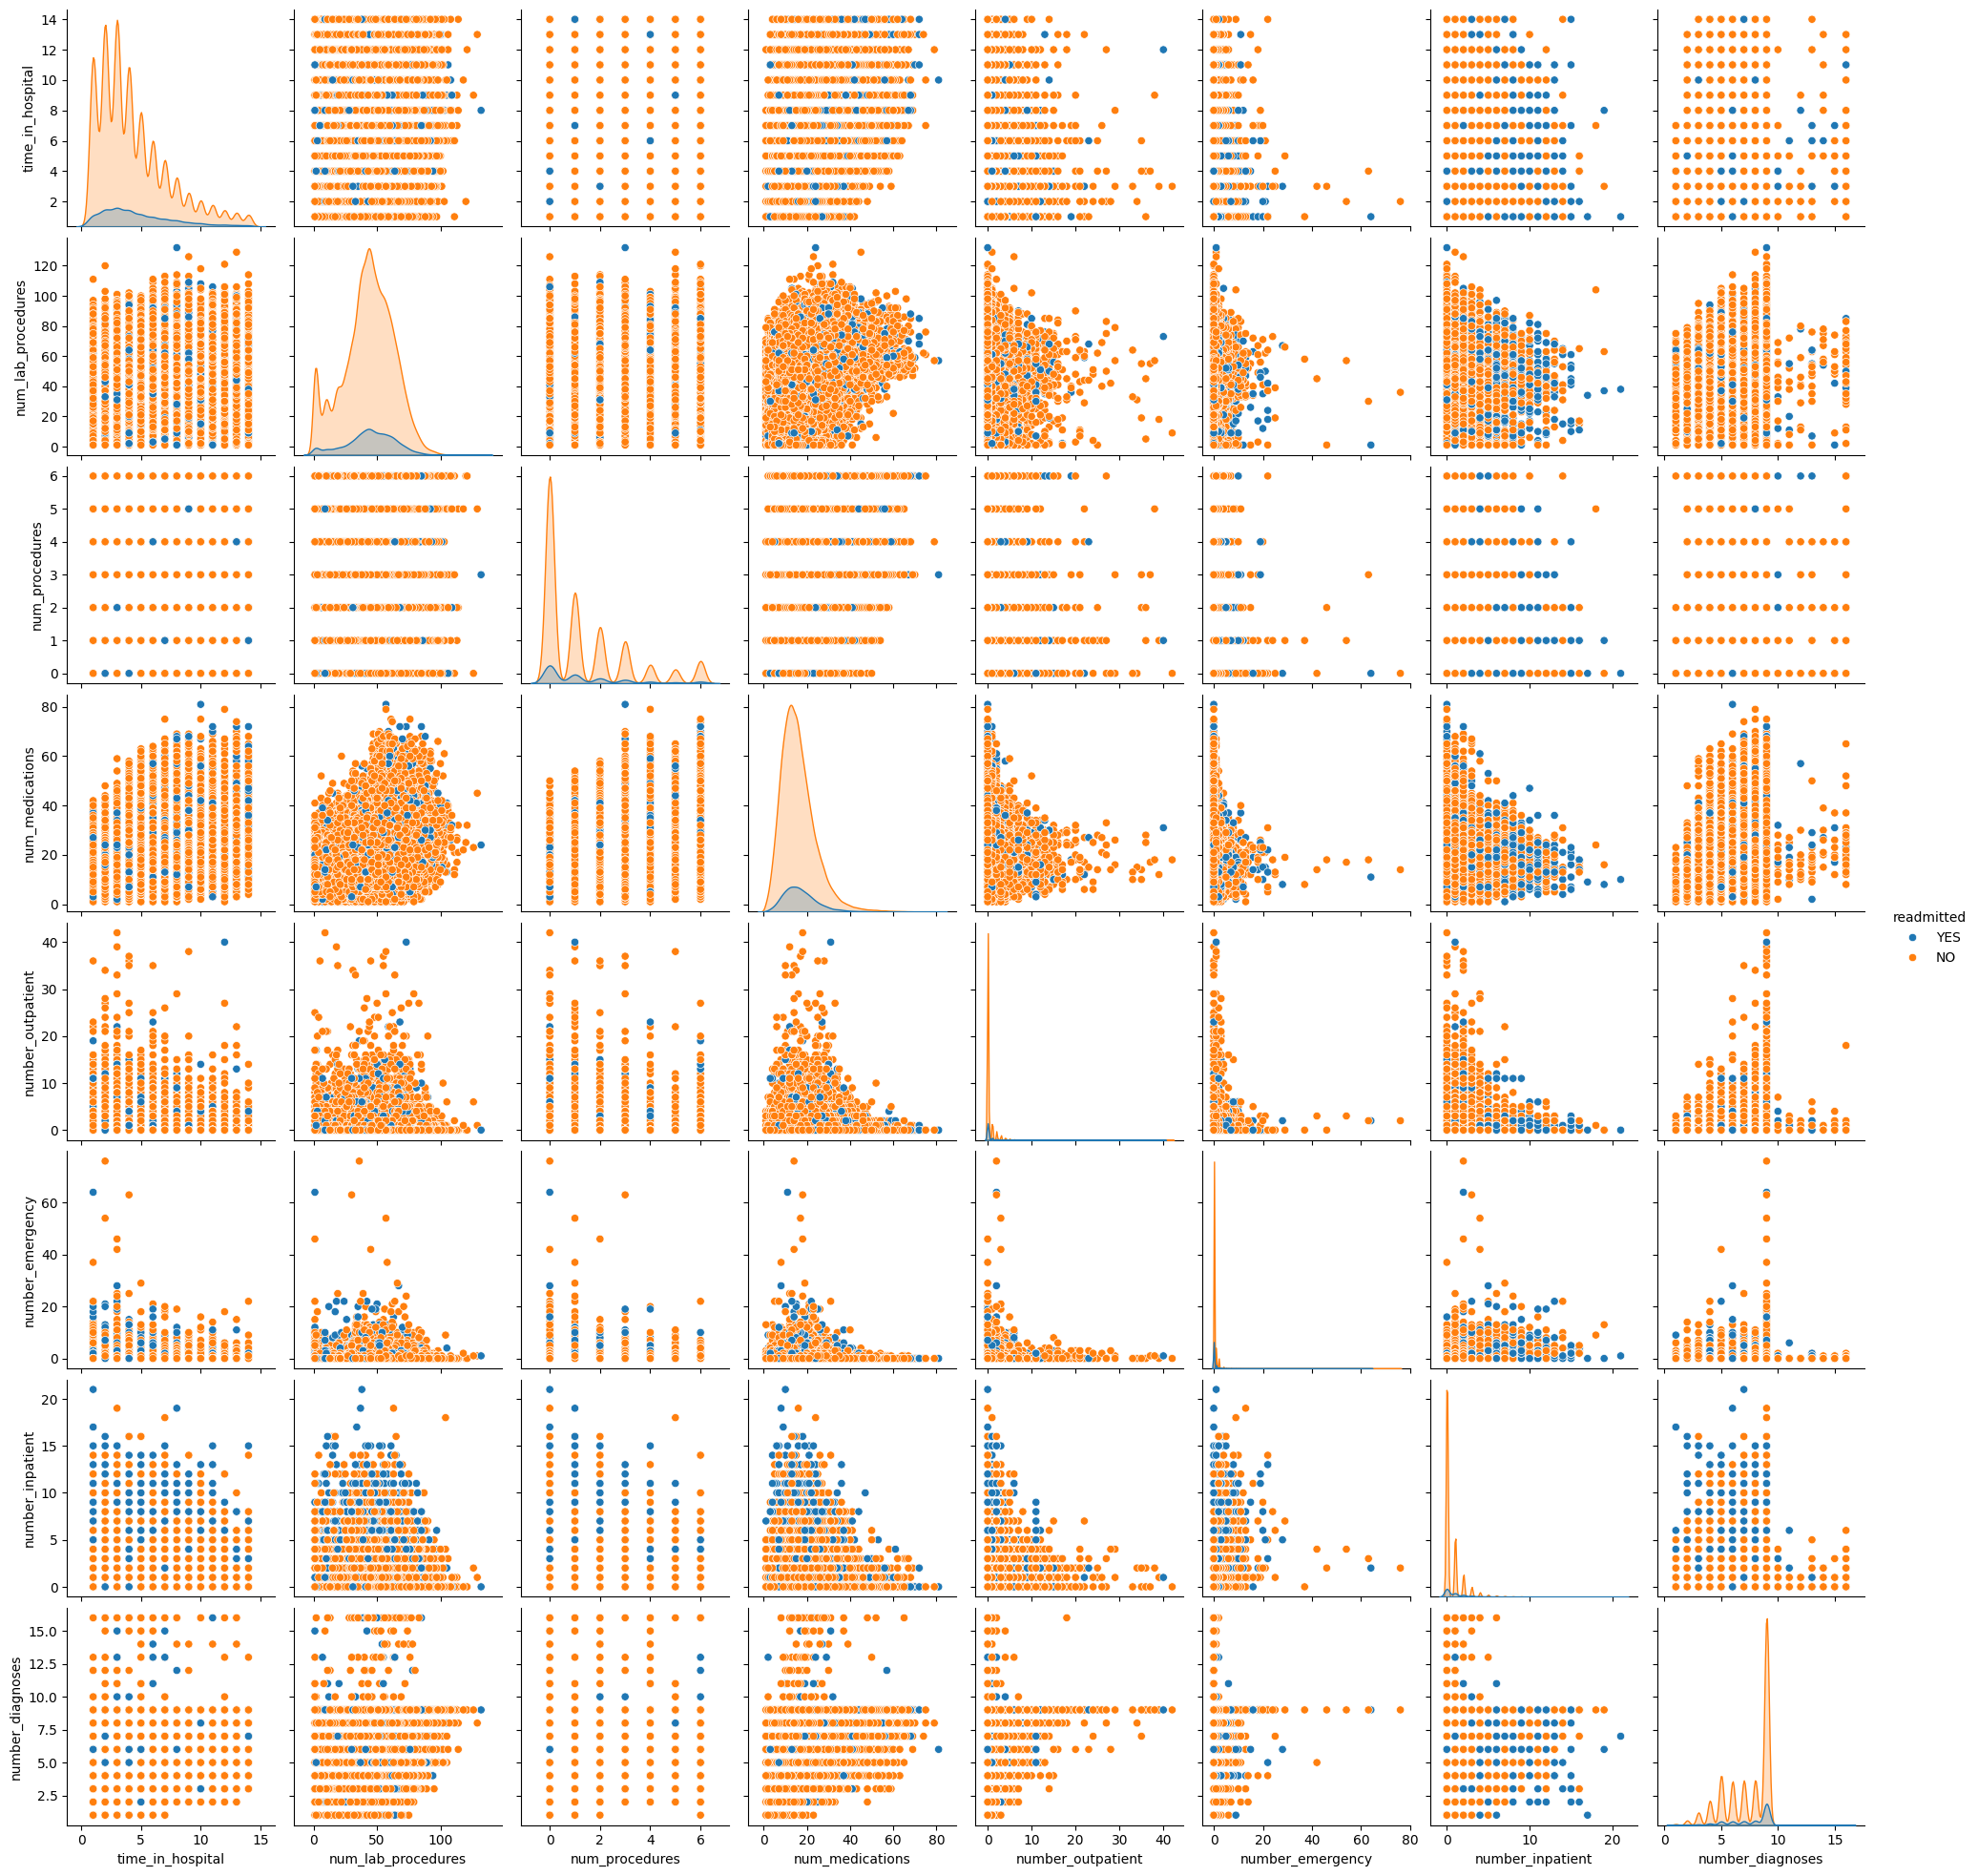

In [29]:
sns.pairplot(df, hue='readmitted')

Вычислим матрицу корреляции для всех признаков, временно факторизовав категориальные

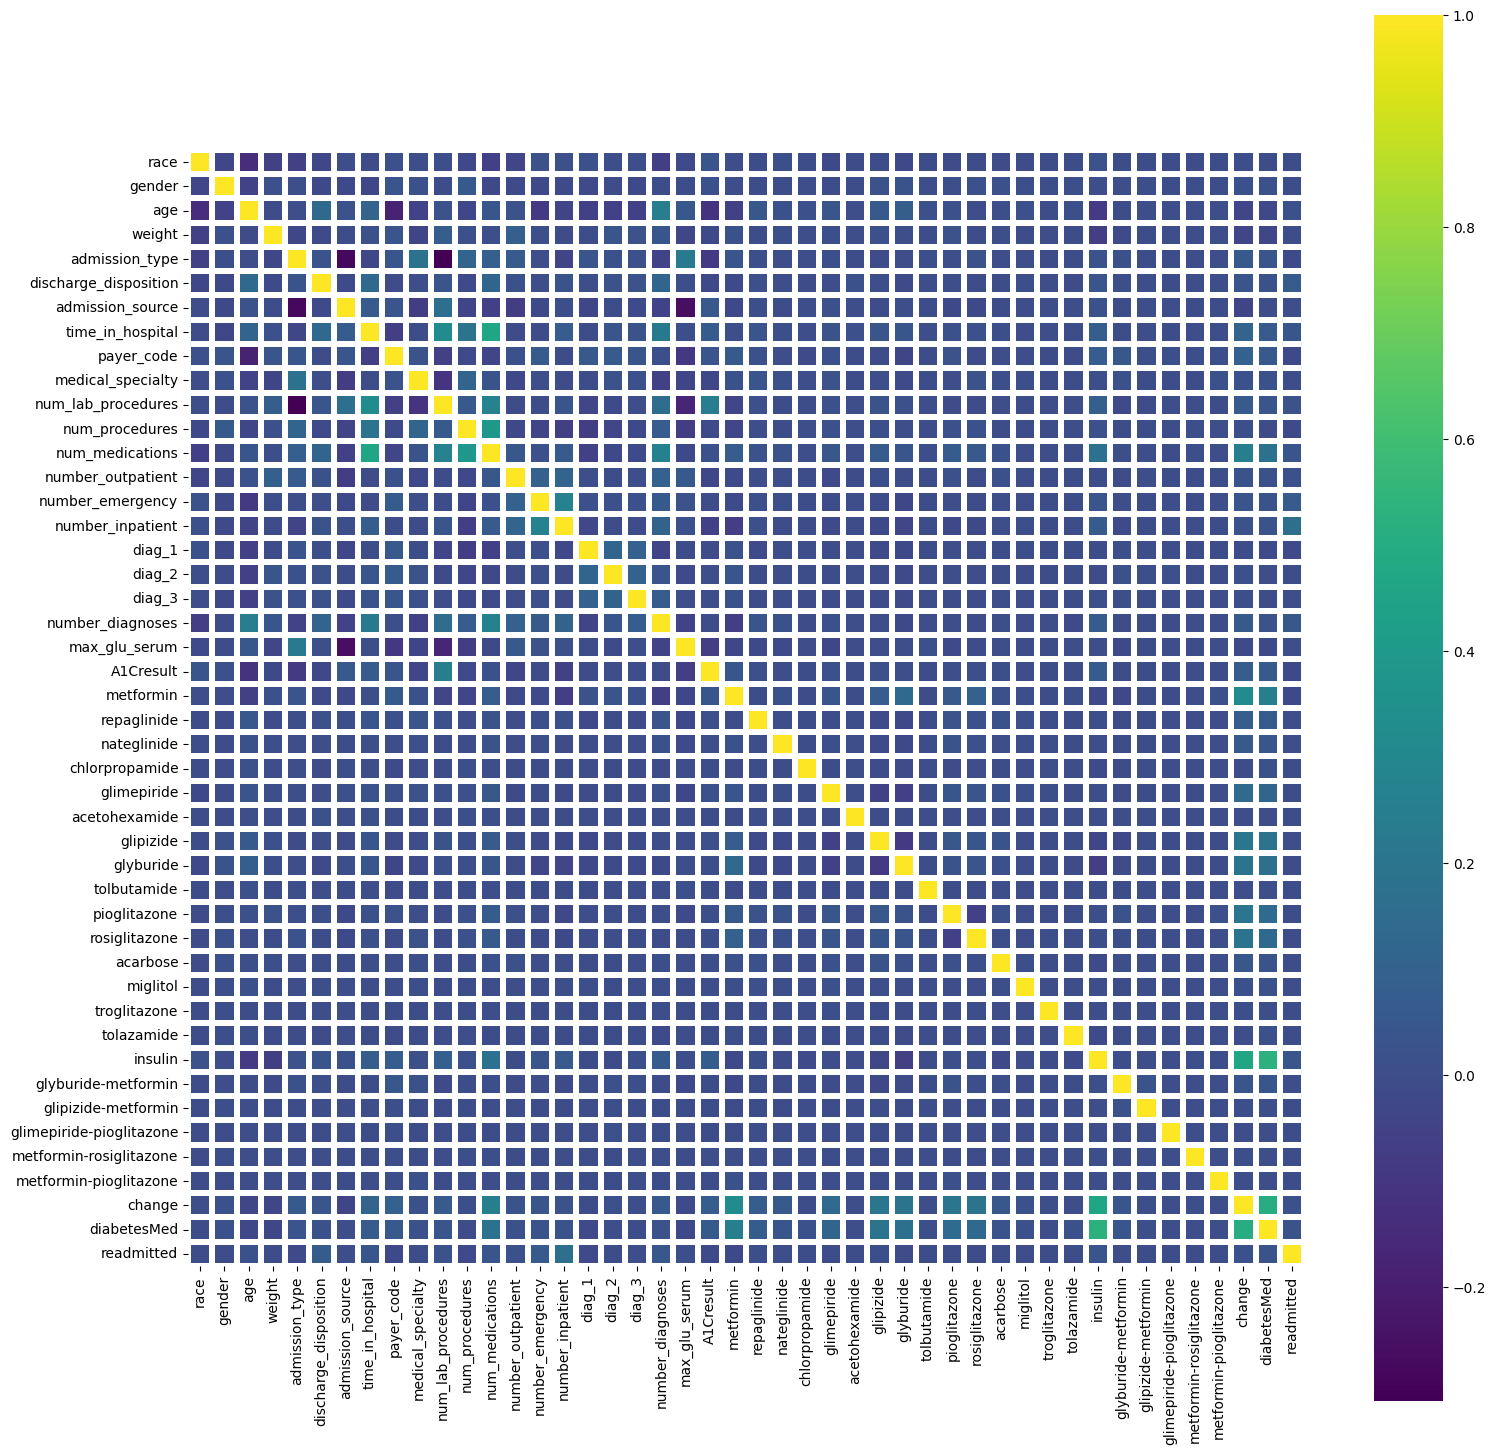

In [30]:
df_f = df.copy()
for column in df_f.select_dtypes(['category']):
    df_f[column] = pd.factorize(df_f[column])[0]

corr_mat_f = df_f.corr()

plt.figure(figsize=(18, 18))
sns.heatmap(corr_mat_f, cmap= 'viridis', linewidths=3, linecolor='white', square=True)
pass

Сильно скоррелированных признаков нет. Поищем пары признаков, для которых коэффициент корреляции больше некоторого значения.

In [31]:
corr_mat_f.where(np.triu(corr_mat_f > 0.35, k=1)).stack().sort_values(ascending=False)

insulin           diabetesMed        0.528249
change            diabetesMed        0.506360
insulin           change             0.468251
time_in_hospital  num_medications    0.466137
num_procedures    num_medications    0.385761
dtype: float64

Хотя у признаков нет сильной связи, можно сказать, что существует средняя взаимосвязь между insulin, change и diabetesMed. Это обусловлено тем, что инсулин обычно назначается как лекарство для лечения диабета. Также можно наблюдать связь между time_in_hospital и num_medications. Чем дольше пациент находится в больнице (по разным причинам, оставаясь при этом пациентом), тем больше лекарств ему требуется для выздоровления. Аналогичная ситуация со взаимосвязью между num_procedures и num_medications.
# обработка пропущенных значений
Где-то выше уже была оценка пропущенных значений, но сделаем это снова и разберемся с ними

In [32]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False)

weight                      96.858387
max_glu_serum               94.746617
A1Cresult                   83.276829
medical_specialty           49.081690
payer_code                  39.557600
admission_source             6.663522
admission_type               5.199336
discharge_disposition        3.627055
race                         2.231656
diag_3                       1.398347
diag_2                       0.351798
diag_1                       0.020636
acarbose                     0.000000
miglitol                     0.000000
troglitazone                 0.000000
rosiglitazone                0.000000
pioglitazone                 0.000000
tolazamide                   0.000000
glyburide-metformin          0.000000
insulin                      0.000000
glyburide                    0.000000
glipizide-metformin          0.000000
glimepiride-pioglitazone     0.000000
metformin-rosiglitazone      0.000000
metformin-pioglitazone       0.000000
change                       0.000000
diabetesMed 

Видим очень сильный разброс по пропущенным значениям. Некоторые достигат больше 90%. Такие мы восстановить не сможем. 
Так же есть признаки, где пропущенных значений меньше 3%. Из таблицы можно удалить эти строки, в которых находятся пропущенные значения

In [33]:
df.dropna(subset=['race', 'diag_3', 'diag_2', 'diag_1'], inplace=True)
df.shape

(98052, 46)

Так же удалим признак payer_code, ведь он, очевидно, не несет никакой смысловой нагрузки для нашей задачи, а пропущенных значений в нем почти 40%. Для нас данный признак не существенный.

Удалим и признак weight, так как он отсутвует практически в 97% процентов случаев и его восстановить просто невозможно.

In [34]:
df.drop(['payer_code'], axis=1, inplace=True)
df.shape

(98052, 45)

In [35]:
df.drop(['weight'], axis=1, inplace=True)
df.shape

(98052, 44)

Для признаков admission_source и admission_type есть специальное значение 'Not Available', на которое можно заменить пропущенные значения

In [36]:
df['admission_source'].fillna('Not Available', inplace=True)
df['admission_type'].fillna('Not Available', inplace=True)

А для оставшихся признаков discharge_disposition и medical_specialty имеет смысл специально добавить значение 'Not Available', на которое заменим пропущенные значения

In [37]:
df['discharge_disposition'] = df['discharge_disposition'].cat.add_categories('Not Available')
df['discharge_disposition'].fillna('Not Available', inplace=True)

df['medical_specialty'] = df['medical_specialty'].cat.add_categories('Not Available')
df['medical_specialty'].fillna('Not Available', inplace=True)

In [38]:

(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False)

max_glu_serum               94.688533
A1Cresult                   83.485294
race                         0.000000
miglitol                     0.000000
acetohexamide                0.000000
glipizide                    0.000000
glyburide                    0.000000
tolbutamide                  0.000000
pioglitazone                 0.000000
rosiglitazone                0.000000
acarbose                     0.000000
troglitazone                 0.000000
chlorpropamide               0.000000
tolazamide                   0.000000
insulin                      0.000000
glyburide-metformin          0.000000
glipizide-metformin          0.000000
glimepiride-pioglitazone     0.000000
metformin-rosiglitazone      0.000000
metformin-pioglitazone       0.000000
change                       0.000000
diabetesMed                  0.000000
glimepiride                  0.000000
nateglinide                  0.000000
gender                       0.000000
repaglinide                  0.000000
age         

остались только признаки с тестами на глюкозу и А1С. Их мы тоже заменим на Not Available

In [39]:
df['A1Cresult'] = df['A1Cresult'].cat.add_categories('Not Available')
df['A1Cresult'].fillna('Not Available', inplace=True)

df['max_glu_serum'] = df['max_glu_serum'].cat.add_categories('Not Available')
df['max_glu_serum'].fillna('Not Available', inplace=True)

хочу и пересчитаю предудыщие визуализаторы для этих тестов

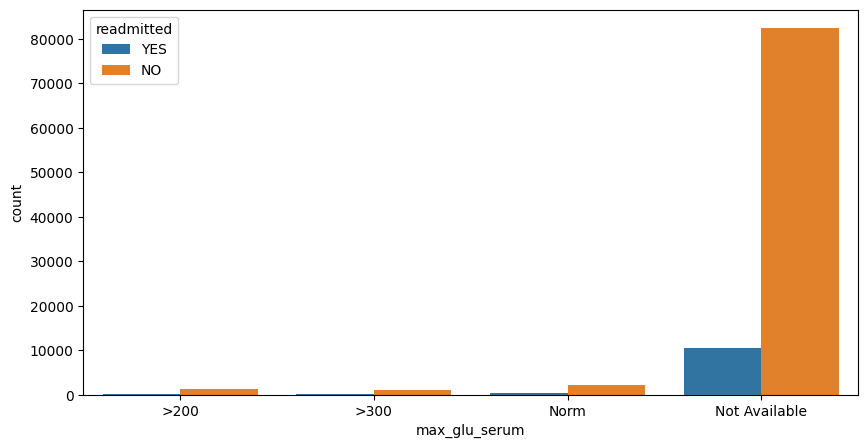

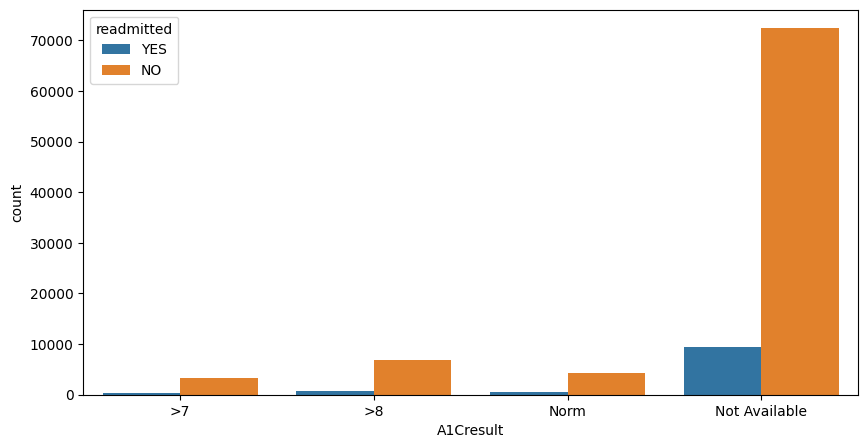

In [40]:
plt.figure(figsize=(10, 5))
sns.countplot(x='max_glu_serum', hue='readmitted', data=df)
pass

plt.figure(figsize=(10, 5))
sns.countplot(x='A1Cresult', hue='readmitted', data=df)
pass

Вот теперь красивое

In [41]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False)

race                        0.0
gender                      0.0
glimepiride                 0.0
acetohexamide               0.0
glipizide                   0.0
glyburide                   0.0
tolbutamide                 0.0
pioglitazone                0.0
rosiglitazone               0.0
acarbose                    0.0
miglitol                    0.0
troglitazone                0.0
tolazamide                  0.0
insulin                     0.0
glyburide-metformin         0.0
glipizide-metformin         0.0
glimepiride-pioglitazone    0.0
metformin-rosiglitazone     0.0
metformin-pioglitazone      0.0
change                      0.0
diabetesMed                 0.0
chlorpropamide              0.0
nateglinide                 0.0
repaglinide                 0.0
num_medications             0.0
age                         0.0
admission_type              0.0
discharge_disposition       0.0
admission_source            0.0
time_in_hospital            0.0
medical_specialty           0.0
num_lab_

In [42]:
df.describe(include=['category']).T

count unique                 top   freq
race                      98052      5           Caucasian  75079
gender                    98052      2              Female  52833
age                       98052     10             [70-80)  25305
admission_type            98052      7           Emergency  52178
discharge_disposition     98052     26  Discharged to home  57609
admission_source          98052     16      Emergency Room  55951
medical_specialty         98052     73       Not Available  48318
diag_1                    98052    713                 428   6730
diag_2                    98052    740                 428   6517
diag_3                    98052    786                 250  11208
max_glu_serum             98052      4       Not Available  92844
A1Cresult                 98052      4       Not Available  81859
metformin                 98052      4                  No  78807
repaglinide               98052      4                  No  96529
nateglinide               98052      4                  No  97361
chlorpropamide            98052      4                  No  97969
glimepiride               98052      4                  No  93065
acetohexamide             98052      2                  No  98051
glipizide                 98052      4                  No  85769
glyburide                 98052      4                  No  87791
tolbutamide               98052      2                  No  98030
pioglitazone              98052      4                  No  90955
rosiglitazone             98052      4                  No  91886
acarbose                  98052      4                  No  97753
miglitol                  98052      4                  No  98015
troglitazone              98052      2                  No  98049
tolazamide                98052      3                  No  98015
insulin                   98052      4                  No  45942
glyburide-metformin       98052      4                  No  97383
glipizide-metformin       98052      2                  No  98039
glimepiride-pioglitazone  98052      2                  No  98051
metformin-rosiglitazone   98052      1                  No  98052
metformin-pioglitazone    98052      2                  No  98051
change                    98052      2                  No  52774
diabetesMed               98052      2                 Yes  75350
readmitted                98052      2                  NO  86986

И вот у нас снова есть признак с уникальным значением. Можем убрать его из таблицы

In [43]:
df.drop(['metformin-rosiglitazone'], axis=1, inplace=True)

df.shape

(98052, 43)

# Обработка категориальных признаков
## Получение числового признака _age_ из категориального

Обработаем признак age. Он принимает значения в виде 10-летнего интервала, а потому имеет смысл заменить интервал на среднее значение интервала, тем самым получив числовой признак

In [44]:
df['age'].unique()

['[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)', '[0-10)']
Categories (10, object): ['[0-10)', '[10-20)', '[20-30)', '[30-40)', ..., '[60-70)', '[70-80)', '[80-90)', '[90-100)']

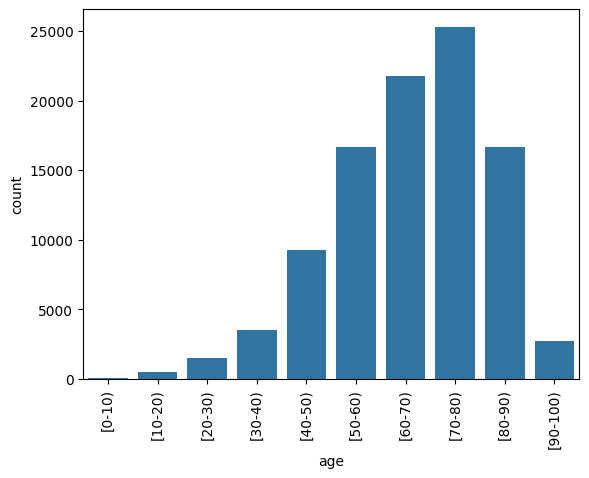

In [45]:
sns.countplot(x="age", data = df)
plt.xticks(rotation = 90)
plt.show()

Заменим интервал возраст на среднее значение интервала

In [46]:
age = df['age'].copy()

for i in range(0, 10):
    interval_str = '[' + str(10 * i) + '-' + str(10 * (i + 1)) + ')'
    mean_of_interval = 10 * i + 5
    age = age.replace(interval_str, mean_of_interval)  # заменяем интервал на среднее

age = pd.to_numeric(age)  # меняем тип на числовой
df.drop(['age'], axis=1, inplace=True)  # удаляем из исходной таблицы старый категориальный признак age
df = pd.concat([age, df], axis=1)  # добавляем новый числовой признак age

In [47]:
df.dtypes

age                            int64
race                        category
gender                      category
admission_type              category
discharge_disposition       category
admission_source            category
time_in_hospital               int64
medical_specialty           category
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
number_outpatient              int64
number_emergency               int64
number_inpatient               int64
diag_1                      category
diag_2                      category
diag_3                      category
number_diagnoses               int64
max_glu_serum               category
A1Cresult                   category
metformin                   category
repaglinide                 category
nateglinide                 category
chlorpropamide              category
glimepiride                 category
acetohexamide               category
glipizide                   category
g

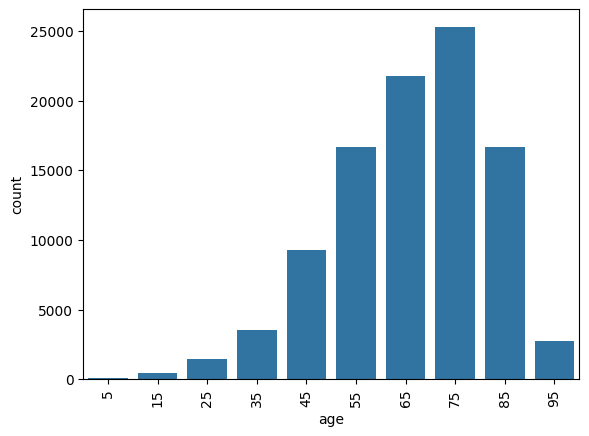

In [48]:
sns.countplot(x="age", data = df)
plt.xticks(rotation = 90)
plt.show()

Отдельно сохраним таблицу исключительно с количественными признаками (те, для которых на данный момент dtype == int64). Впоследствии это облегчит процесс нормализации данных, т.к. нормализируем мы только количественные признаки.

In [49]:
df_num = df.select_dtypes(['int64'])  

In [50]:
df_num

age  time_in_hospital  num_lab_procedures  num_procedures  \
1        15                 3                  59               0   
2        25                 2                  11               5   
3        35                 2                  44               1   
4        45                 1                  51               0   
5        55                 3                  31               6   
...     ...               ...                 ...             ...   
101761   75                 3                  51               0   
101762   85                 5                  33               3   
101763   75                 1                  53               0   
101764   85                10                  45               2   
101765   75                 6                  13               3   

        num_medications  number_outpatient  number_emergency  \
1                    18                  0                 0   
2                    13                  2                 0   
3                    16                  0                 0   
4                     8                  0                 0   
5                    16                  0                 0   
...                 ...                ...               ...   
101761               16                  0                 0   
101762               18                  0                 0   
101763                9                  1                 0   
101764               21                  0                 0   
101765                3                  0                 0   

        number_inpatient  number_diagnoses  
1                      0                 9  
2                      1                 6  
3                      0                 7  
4                      0                 5  
5                      0                 9  
...                  ...               ...  
101761                 0                 9  
101762                 1                 9  
101763                 0                13  
101764                 1                 9  
101765                 0                 9  

[98052 rows x 9 columns]

Временно удалим из исходной таблицы количественные признаки. После обработки категориальных признаков, можно будет объединить в единую таблицу

In [51]:
df.drop(df_num, axis=1, inplace=True)

# категоризация заболеваний

In [52]:
len(df['diag_1'].unique())

713

In [53]:
len(df['diag_2'].unique())

740

In [54]:
len(df['diag_3'].unique())

786

Уникальных значений крайне много. Сгруппируем диагнозы в категории.

* Circulatory - Заболевания системы кровообращения (коды МКБ9: 390–459, 785)
* Respiratory - Заболевания дыхательной системы (коды МКБ9: 460–519, 786)
* Digestive - Заболевания пищеварительной системы (коды МКБ9: 520–579, 787)
* Diabetes - Сахарный диабет (коды МКБ9: 250.xx)
* Injury - Травмы и отравления (коды МКБ9: 800–999)
* Musculoskeletal - Заболевания опорно-двигательного аппарата и соединительной ткани (коды МКБ9: 710–739)
* Genitourinary - Заболевания мочеполовой системы (коды МКБ9: 580–629, 788)
* Neoplasms - Новообразования (коды МКБ9: 140–239)
* Other - Другие заболевания, не принадлежащие ни одной из вышеперечисленных категорий

Также, как и с числовыми признаками, скопируем часть исходной таблицы с признаками diag_1, diag_2, diag_3

In [55]:
diags = ['diag_1', 'diag_2', 'diag_3']

df_diags = df[diags].copy()

In [56]:
diag_categories = [
    'Circulatory', 
    'Respiratory', 
    'Digestive', 
    'Diabetes', 
    'Injury', 
    'Musculoskeletal', 
    'Genitourinary', 
    'Neoplasms', 
    'Other'
]

for diag in diags:
    df_diags[diag] = df_diags[diag].cat.set_categories(diag_categories)

Для удобства  введем функцию, принимающую на вход код МКБ9 (ICD9), а на выходе возвращающую название категории заболевания. Но не смотря на то, что мы избавились от пропущенных значений, все же есть валидные коды, начинающиеся с'E и'V' Эти заболевания должны быть отнесены к категории 'Other'.

In [57]:
def get_diag_category(icd9_code: str) -> str:
    if icd9_code[0] == 'E' or icd9_code[0] == 'V':
        return 'Other'
    
    icd9_code = int(float(icd9_code))
    
    if 390 <= icd9_code <= 459 or icd9_code == 785:
        return 'Circulatory'
    if 460 <= icd9_code <= 519 or icd9_code == 786:
        return 'Respiratory'
    if 520 <= icd9_code <= 579 or icd9_code == 787:
        return 'Digestive'
    if icd9_code == 250:
        return 'Diabetes'
    if 800 <= icd9_code <= 999:
        return 'Injury'
    if 710 <= icd9_code <= 739:
        return 'Musculoskeletal'
    if 580 <= icd9_code <= 629 or icd9_code == 788:
        return 'Genitourinary'
    if 140 <= icd9_code <= 239:
        return 'Neoplasms'
    
    return 'Other'

In [58]:
for index, row in df.iterrows():
    for diag in diags:
        df_diags.loc[index, diag] = get_diag_category(df.loc[index, diag])

Перебирая все строки исходной таблицы, с помощью функции get_diag_category() заполняем новую таблицу с признаками diag_1, diag_2, diag_3

In [59]:
df_diags.T

1         2            3          4            5            6       \
diag_1     Other     Other        Other  Neoplasms  Circulatory  Circulatory   
diag_2  Diabetes  Diabetes     Diabetes  Neoplasms  Circulatory  Circulatory   
diag_3     Other     Other  Circulatory   Diabetes     Diabetes        Other   

             7            8            9            10      ...  \
diag_1  Circulatory  Circulatory  Circulatory     Diabetes  ...   
diag_2  Respiratory  Circulatory    Neoplasms  Circulatory  ...   
diag_3     Diabetes        Other  Respiratory       Injury  ...   

               101756       101757 101758       101759       101760  \
diag_1         Injury  Respiratory  Other  Circulatory        Other   
diag_2  Genitourinary  Respiratory  Other        Other  Circulatory   
diag_3    Circulatory  Respiratory  Other     Diabetes  Circulatory   

             101761     101762         101763  101764     101765  
diag_1     Diabetes  Digestive          Other  Injury  Digestive  
diag_2        Other      Other  Genitourinary   Other  Digestive  
diag_3  Circulatory  Digestive          Other  Injury  Digestive  

[3 rows x 98052 columns]

Признаки могут принимать значения не всех кодов заболеваний, возникают неиспользуемые категории. От них следует избавиться, чтобы в последующем уменьшить размерности векторов.

In [60]:
for diag in diags:
    df_diags[diag] = df_diags[diag].cat.remove_unused_categories()

Теперь заменяем "старые" признаки diag_1, diag_2, diag_3 на их "новые".

In [61]:
df.drop(diags, axis=1, inplace=True)    # удаляем из исходной таблицы "старые" признаки diag_1, diag_2, diag_3
df = pd.concat([df, df_diags], axis=1)  # добавляем новые признаки diag_1, diag_2, diag_3

In [62]:
df.describe(include=['category']).T

count unique                 top   freq
race                      98052      5           Caucasian  75079
gender                    98052      2              Female  52833
admission_type            98052      7           Emergency  52178
discharge_disposition     98052     26  Discharged to home  57609
admission_source          98052     16      Emergency Room  55951
medical_specialty         98052     73       Not Available  48318
max_glu_serum             98052      4       Not Available  92844
A1Cresult                 98052      4       Not Available  81859
metformin                 98052      4                  No  78807
repaglinide               98052      4                  No  96529
nateglinide               98052      4                  No  97361
chlorpropamide            98052      4                  No  97969
glimepiride               98052      4                  No  93065
acetohexamide             98052      2                  No  98051
glipizide                 98052      4                  No  85769
glyburide                 98052      4                  No  87791
tolbutamide               98052      2                  No  98030
pioglitazone              98052      4                  No  90955
rosiglitazone             98052      4                  No  91886
acarbose                  98052      4                  No  97753
miglitol                  98052      4                  No  98015
troglitazone              98052      2                  No  98049
tolazamide                98052      3                  No  98015
insulin                   98052      4                  No  45942
glyburide-metformin       98052      4                  No  97383
glipizide-metformin       98052      2                  No  98039
glimepiride-pioglitazone  98052      2                  No  98051
metformin-pioglitazone    98052      2                  No  98051
change                    98052      2                  No  52774
diabetesMed               98052      2                 Yes  75350
readmitted                98052      2                  NO  86986
diag_1                    98052      9         Circulatory  29629
diag_2                    98052      9         Circulatory  31103
diag_3                    98052      9         Circulatory  29631

## Кодирование номинальных  признаков

Сначала все бинарные признаки заменим на числовые (0 и 1)

In [63]:
cat_columns = df.select_dtypes(['category'])

for column in cat_columns:
    if df[column].nunique() == 2:
        df[column] = pd.factorize(df[column])[0]

In [64]:
df.describe(include=['category']).T

count unique                 top   freq
race                   98052      5           Caucasian  75079
admission_type         98052      7           Emergency  52178
discharge_disposition  98052     26  Discharged to home  57609
admission_source       98052     16      Emergency Room  55951
medical_specialty      98052     73       Not Available  48318
max_glu_serum          98052      4       Not Available  92844
A1Cresult              98052      4       Not Available  81859
metformin              98052      4                  No  78807
repaglinide            98052      4                  No  96529
nateglinide            98052      4                  No  97361
chlorpropamide         98052      4                  No  97969
glimepiride            98052      4                  No  93065
glipizide              98052      4                  No  85769
glyburide              98052      4                  No  87791
pioglitazone           98052      4                  No  90955
rosiglitazone          98052      4                  No  91886
acarbose               98052      4                  No  97753
miglitol               98052      4                  No  98015
tolazamide             98052      3                  No  98015
insulin                98052      4                  No  45942
glyburide-metformin    98052      4                  No  97383
diag_1                 98052      9         Circulatory  29629
diag_2                 98052      9         Circulatory  31103
diag_3                 98052      9         Circulatory  29631

Все признаки, кроме discharge_disposition, admission_source и medical_specialty, содержат число уникальных значений от 2 до 10, а значит, для их кодирования логично применить метод бинаризации (one-hot encoding), предварительно убрав неиспользуемые категории

In [65]:
cat_columns = df.select_dtypes(['category'])

for column in cat_columns:
    if df[column].nunique() < 10:
        df[column] = df[column].cat.remove_unused_categories()  # убираем неиспользуемые категории
        df_dummies = pd.get_dummies(df[column], prefix=column)  # one-hot encoding
        df.drop(column, axis=1, inplace=True)                   # удаляем из исходной таблицы "старые" признаки
        df = pd.concat([df, df_dummies], axis=1)                # добавляем бинаризованные ("новые") признаки

In [66]:
df.describe().T

count      mean       std  min  25%  50%  75%  max
gender                    98052.0  0.461174  0.498493  0.0  0.0  0.0  1.0  1.0
acetohexamide             98052.0  0.000010  0.003194  0.0  0.0  0.0  0.0  1.0
tolbutamide               98052.0  0.000224  0.014977  0.0  0.0  0.0  0.0  1.0
troglitazone              98052.0  0.000031  0.005531  0.0  0.0  0.0  0.0  1.0
glipizide-metformin       98052.0  0.000133  0.011514  0.0  0.0  0.0  0.0  1.0
glimepiride-pioglitazone  98052.0  0.000010  0.003194  0.0  0.0  0.0  0.0  1.0
metformin-pioglitazone    98052.0  0.000010  0.003194  0.0  0.0  0.0  0.0  1.0
change                    98052.0  0.538225  0.498539  0.0  0.0  1.0  1.0  1.0
diabetesMed               98052.0  0.231530  0.421813  0.0  0.0  0.0  0.0  1.0
readmitted                98052.0  0.112858  0.316421  0.0  0.0  0.0  0.0  1.0

Признаки discharge_disposition, admission_source и medical_specialty содержат большое число уникальных значений, поэтому рассмотренные выше методы для кодирования не годятся. Для кодирования применим метод бинарного кодирования из библиотеки category_encoders

Кодируем признак _discharge_disposition_ и заменяем "старый" признак "новым" кодированным.

In [67]:
encoder = ce.BinaryEncoder(return_df=True)
df_discharge_disposition = encoder.fit_transform(df['discharge_disposition'])
df_discharge_disposition.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98052 entries, 1 to 101765
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   discharge_disposition_0  98052 non-null  int64
 1   discharge_disposition_1  98052 non-null  int64
 2   discharge_disposition_2  98052 non-null  int64
 3   discharge_disposition_3  98052 non-null  int64
 4   discharge_disposition_4  98052 non-null  int64
dtypes: int64(5)
memory usage: 4.5 MB


In [68]:
df.drop(['discharge_disposition'], axis=1, inplace=True)
df = pd.concat([df, df_discharge_disposition], axis=1)

In [69]:
encoder = ce.BinaryEncoder(return_df=True)
df_admission_source = encoder.fit_transform(df['admission_source'])
df_admission_source.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98052 entries, 1 to 101765
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   admission_source_0  98052 non-null  int64
 1   admission_source_1  98052 non-null  int64
 2   admission_source_2  98052 non-null  int64
 3   admission_source_3  98052 non-null  int64
 4   admission_source_4  98052 non-null  int64
dtypes: int64(5)
memory usage: 4.5 MB


In [70]:
df.drop(['admission_source'], axis=1, inplace=True)
df = pd.concat([df, df_admission_source], axis=1)

Кодируем признак medical_specialty и заменяем "старый" признак "новым" кодированным.

In [71]:
encoder = ce.BinaryEncoder(return_df=True)
df_medical_specialty = encoder.fit_transform(df['medical_specialty'])
df_medical_specialty.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98052 entries, 1 to 101765
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   medical_specialty_0  98052 non-null  int64
 1   medical_specialty_1  98052 non-null  int64
 2   medical_specialty_2  98052 non-null  int64
 3   medical_specialty_3  98052 non-null  int64
 4   medical_specialty_4  98052 non-null  int64
 5   medical_specialty_5  98052 non-null  int64
 6   medical_specialty_6  98052 non-null  int64
dtypes: int64(7)
memory usage: 6.0 MB


In [72]:
df.drop(['medical_specialty'], axis=1, inplace=True)
df = pd.concat([df, df_medical_specialty], axis=1)

In [73]:
df.describe().T

count      mean       std  min  25%  50%  75%  max
gender                    98052.0  0.461174  0.498493  0.0  0.0  0.0  1.0  1.0
acetohexamide             98052.0  0.000010  0.003194  0.0  0.0  0.0  0.0  1.0
tolbutamide               98052.0  0.000224  0.014977  0.0  0.0  0.0  0.0  1.0
troglitazone              98052.0  0.000031  0.005531  0.0  0.0  0.0  0.0  1.0
glipizide-metformin       98052.0  0.000133  0.011514  0.0  0.0  0.0  0.0  1.0
glimepiride-pioglitazone  98052.0  0.000010  0.003194  0.0  0.0  0.0  0.0  1.0
metformin-pioglitazone    98052.0  0.000010  0.003194  0.0  0.0  0.0  0.0  1.0
change                    98052.0  0.538225  0.498539  0.0  0.0  1.0  1.0  1.0
diabetesMed               98052.0  0.231530  0.421813  0.0  0.0  0.0  0.0  1.0
readmitted                98052.0  0.112858  0.316421  0.0  0.0  0.0  0.0  1.0
discharge_disposition_0   98052.0  0.027322  0.163021  0.0  0.0  0.0  0.0  1.0
discharge_disposition_1   98052.0  0.064762  0.246106  0.0  0.0  0.0  0.0  1.0
discharge_disposition_2   98052.0  0.098285  0.297701  0.0  0.0  0.0  0.0  1.0
discharge_disposition_3   98052.0  0.330406  0.470362  0.0  0.0  0.0  1.0  1.0
discharge_disposition_4   98052.0  0.743575  0.436661  0.0  0.0  1.0  1.0  1.0
admission_source_0        98052.0  0.000010  0.003194  0.0  0.0  0.0  0.0  1.0
admission_source_1        98052.0  0.070065  0.255258  0.0  0.0  0.0  0.0  1.0
admission_source_2        98052.0  0.318984  0.466085  0.0  0.0  0.0  1.0  1.0
admission_source_3        98052.0  0.061702  0.240615  0.0  0.0  0.0  0.0  1.0
admission_source_4        98052.0  0.678915  0.466896  0.0  0.0  1.0  1.0  1.0
medical_specialty_0       98052.0  0.000938  0.030617  0.0  0.0  0.0  0.0  1.0
medical_specialty_1       98052.0  0.032014  0.176037  0.0  0.0  0.0  0.0  1.0
medical_specialty_2       98052.0  0.044456  0.206107  0.0  0.0  0.0  0.0  1.0
medical_specialty_3       98052.0  0.154041  0.360990  0.0  0.0  0.0  0.0  1.0
medical_specialty_4       98052.0  0.225136  0.417674  0.0  0.0  0.0  0.0  1.0
medical_specialty_5       98052.0  0.277802  0.447917  0.0  0.0  0.0  1.0  1.0
medical_specialty_6       98052.0  0.671450  0.469688  0.0  0.0  1.0  1.0  1.0

# Нормализация количественных признаков
Проведем стандартизацию (линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению) всех признаков

In [74]:
df_num = (df_num - df_num.mean(axis=0)) / df_num.std(axis=0)

In [75]:
df_num.describe()

age  time_in_hospital  num_lab_procedures  num_procedures  \
count  9.805200e+04      9.805200e+04        9.805200e+04    9.805200e+04   
mean   1.623236e-17      2.087018e-17       -1.791357e-16    5.543642e-18   
std    1.000000e+00      1.000000e+00        1.000000e+00    1.000000e+00   
min   -3.929255e+00     -1.143311e+00       -2.138240e+00   -7.905951e-01   
25%   -7.222366e-01     -8.092063e-01       -6.163054e-01   -7.905951e-01   
50%   -8.083288e-02     -1.409960e-01        4.319950e-02   -2.052777e-01   
75%    5.605708e-01      5.272143e-01        7.027044e-01    3.800396e-01   
max    1.843378e+00      3.200055e+00        4.507540e+00    2.721309e+00   

       num_medications  number_outpatient  number_emergency  number_inpatient  \
count     9.805200e+04       9.805200e+04      9.805200e+04      9.805200e+04   
mean      9.855364e-17       1.159455e-18      2.782691e-17      8.319086e-17   
std       1.000000e+00       1.000000e+00      1.000000e+00      1.000000e+00   
min      -1.864660e+00      -2.932773e-01     -2.147255e-01     -5.089364e-01   
25%      -6.313859e-01      -2.932773e-01     -2.147255e-01     -5.089364e-01   
50%      -1.380761e-01      -2.932773e-01     -2.147255e-01     -5.089364e-01   
75%       4.785611e-01      -2.932773e-01     -2.147255e-01      2.778300e-01   
max       8.001535e+00       3.243318e+01      8.038794e+01      1.601316e+01   

       number_diagnoses  
count      9.805200e+04  
mean      -1.669615e-16  
std        1.000000e+00  
min       -2.462300e+00  
25%       -8.251672e-01  
50%        2.662548e-01  
75%        8.119658e-01  
max        4.631943e+00

Объединим стандартизованные количественные признаки с уже обработанными категориальными признаками

In [76]:
df = pd.concat([df_num, df], axis=1)

In [77]:
df.describe()

age  time_in_hospital  num_lab_procedures  num_procedures  \
count  9.805200e+04      9.805200e+04        9.805200e+04    9.805200e+04   
mean   1.623236e-17      2.087018e-17       -1.791357e-16    5.543642e-18   
std    1.000000e+00      1.000000e+00        1.000000e+00    1.000000e+00   
min   -3.929255e+00     -1.143311e+00       -2.138240e+00   -7.905951e-01   
25%   -7.222366e-01     -8.092063e-01       -6.163054e-01   -7.905951e-01   
50%   -8.083288e-02     -1.409960e-01        4.319950e-02   -2.052777e-01   
75%    5.605708e-01      5.272143e-01        7.027044e-01    3.800396e-01   
max    1.843378e+00      3.200055e+00        4.507540e+00    2.721309e+00   

       num_medications  number_outpatient  number_emergency  number_inpatient  \
count     9.805200e+04       9.805200e+04      9.805200e+04      9.805200e+04   
mean      9.855364e-17       1.159455e-18      2.782691e-17      8.319086e-17   
std       1.000000e+00       1.000000e+00      1.000000e+00      1.000000e+00   
min      -1.864660e+00      -2.932773e-01     -2.147255e-01     -5.089364e-01   
25%      -6.313859e-01      -2.932773e-01     -2.147255e-01     -5.089364e-01   
50%      -1.380761e-01      -2.932773e-01     -2.147255e-01     -5.089364e-01   
75%       4.785611e-01      -2.932773e-01     -2.147255e-01      2.778300e-01   
max       8.001535e+00       3.243318e+01      8.038794e+01      1.601316e+01   

       number_diagnoses        gender  ...  admission_source_2  \
count      9.805200e+04  98052.000000  ...        98052.000000   
mean      -1.669615e-16      0.461174  ...            0.318984   
std        1.000000e+00      0.498493  ...            0.466085   
min       -2.462300e+00      0.000000  ...            0.000000   
25%       -8.251672e-01      0.000000  ...            0.000000   
50%        2.662548e-01      0.000000  ...            0.000000   
75%        8.119658e-01      1.000000  ...            1.000000   
max        4.631943e+00      1.000000  ...            1.000000   

       admission_source_3  admission_source_4  medical_specialty_0  \
count        98052.000000        98052.000000         98052.000000   
mean             0.061702            0.678915             0.000938   
std              0.240615            0.466896             0.030617   
min              0.000000            0.000000             0.000000   
25%              0.000000            0.000000             0.000000   
50%              0.000000            1.000000             0.000000   
75%              0.000000            1.000000             0.000000   
max              1.000000            1.000000             1.000000   

       medical_specialty_1  medical_specialty_2  medical_specialty_3  \
count         98052.000000         98052.000000         98052.000000   
mean              0.032014             0.044456             0.154041   
std               0.176037             0.206107             0.360990   
min               0.000000             0.000000             0.000000   
25%               0.000000             0.000000             0.000000   
50%               0.000000             0.000000             0.000000   
75%               0.000000             0.000000             0.000000   
max               1.000000             1.000000             1.000000   

       medical_specialty_4  medical_specialty_5  medical_specialty_6  
count         98052.000000         98052.000000         98052.000000  
mean              0.225136             0.277802             0.671450  
std               0.417674             0.447917             0.469688  
min               0.000000             0.000000             0.000000  
25%               0.000000             0.000000             0.000000  
50%               0.000000             0.000000             1.000000  
75%               0.000000             1.000000             1.000000  
max               1.000000             1.000000             1.000000  

[8 rows x 36 columns]

# Отбор признаков
В качестве целевого признака выберем признак readmitted

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):/

In [78]:
X = df.drop(['readmitted'], axis=1)
y = df['readmitted']

In [79]:
import sklearn
import imblearn

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 58)

X_train.shape, X_test.shape

((73539, 137), (24513, 137))

# борьба с несбалансированностью классов
Для борьбы с дисбалансом классов воспользуемся последовательно следующими методами:

1. oversampling - алгоритмом SMOTE расширим имеющийся датасет синтетическими данными с меткой миноритарного класса. Хотя данные и медицинские, что может в нашем случае привести к генерации примеров, невстречающихся в реальной жизни, данные будут генерироваться в определенном "отрезке" значений (т.к. для каждого признака возможны все промежуточные состояния между встречающимися в наборе), разные признаки друг другу не противоречат и вроде как "возможно все". (По крайней мере что только медики порой не рассказывают с "это невозможно, но вот оно на практике").

2. undersampling - удалим некоторое количество мажориторного класса

In [131]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

over_sampler = SMOTE(sampling_strategy=0.2)
X_train_smote, y_train_smote = over_sampler.fit_resample(X_train, y_train)

under_sampler = RandomUnderSampler(sampling_strategy=0.8)
X_train_bal, y_train_bal = under_sampler.fit_resample(X_train_smote, y_train_smote)

In [132]:
count_minor_before = np.sum(y_train == 1)
print("Original dataset: \t'YES': {} \t'NO': {}".format(count_minor_before, len(y_train) - count_minor_before))

count_minor_after = np.sum(y_train_bal == 1)
print("Balanced dataset: \t'YES': {} \t'NO': {}".format(count_minor_after, len(y_train_bal) - count_minor_after))

Original dataset: 	'YES': 8365 	'NO': 65174
Balanced dataset: 	'YES': 13034 	'NO': 16292


Перейдем к обучению классификаторов на оригинальных и сбалансированных данных.

# обучение классификаторов

## метод KNN для оригинальных данных

Обучим KNN-классификатор по умолчанию (для k = 5):

In [133]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix

In [134]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

ошибка на тренировочной выборке:

In [135]:
%%time
y_train_pred = knn_model.predict(X_train)
print('Accuracy score on train data: {:.2f}%'.format(100 * accuracy_score(y_train, y_train_pred)))
print('         Error on train data: {:.2f}%'.format(100 * np.mean(y_train != y_train_pred)))

Accuracy score on train data: 89.36%
         Error on train data: 10.64%
CPU times: total: 49.6 s
Wall time: 12.2 s


ошибка на тестовой выборке:

In [136]:
%%time
y_test_pred = knn_model.predict(X_test)
print('Accuracy score on test data:  {:.2f}%'.format(100 * accuracy_score(y_test,  y_test_pred)))
print('         Error on test data:  {:.2f}%'.format(100 * np.mean(y_test != y_test_pred)))

Accuracy score on test data:  88.10%
         Error on test data:  11.90%
CPU times: total: 16.8 s
Wall time: 4.13 s


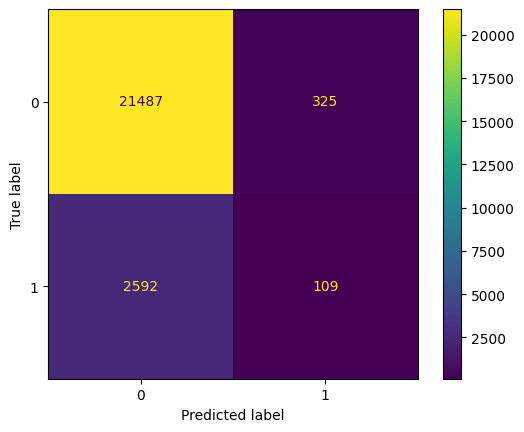

In [137]:
import pylab as pl
cm=confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=knn_model.classes_)
disp.plot()

plt.show()

Получили матрицу рассогласования. Из-за несбалансированности классов качество работы обученной модели недостаточно.

Обучим несколько KNN-классификаторов для разных значений k от 5 до 50 c шагом 3, собирая "по пути" значения полученных ошибок для дальнейшего анализа


In [138]:
%%time

acc_train = []
err_train = []
acc_test = []
err_test = []

k_values = range(5, 51, 3)

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    print('k = {}:'.format(k))
    
    y_train_pred = knn_model.predict(X_train)
    print('    Accuracy score on train data: {:.2f}%'.format(100 * accuracy_score(y_train, y_train_pred)))
    print('             Error on train data: {:.2f}%'.format(100 * np.mean(y_train != y_train_pred)))
    acc_train.append(accuracy_score(y_train, y_train_pred))
    err_train.append(np.mean(y_train != y_train_pred))
    
    y_test_pred = knn_model.predict(X_test)
    print('    Accuracy score on test  data: {:.2f}%'.format(100 * accuracy_score(y_test,  y_test_pred)))
    print('             Error on test  data: {:.2f}%'.format(100 * np.mean(y_test != y_test_pred)))
    acc_test.append(accuracy_score(y_test, y_test_pred))
    err_test.append(np.mean(y_test != y_test_pred))

k = 5:
    Accuracy score on train data: 89.36%
             Error on train data: 10.64%
    Accuracy score on test  data: 88.10%
             Error on test  data: 11.90%
k = 8:
    Accuracy score on train data: 88.90%
             Error on train data: 11.10%
    Accuracy score on test  data: 88.85%
             Error on test  data: 11.15%
k = 11:
    Accuracy score on train data: 88.87%
             Error on train data: 11.13%
    Accuracy score on test  data: 88.81%
             Error on test  data: 11.19%
k = 14:
    Accuracy score on train data: 88.74%
             Error on train data: 11.26%
    Accuracy score on test  data: 88.97%
             Error on test  data: 11.03%
k = 17:
    Accuracy score on train data: 88.76%
             Error on train data: 11.24%
    Accuracy score on test  data: 88.94%
             Error on test  data: 11.06%
k = 20:
    Accuracy score on train data: 88.69%
             Error on train data: 11.31%
    Accuracy score on test  data: 89.00%
           

построим графики значений точности и ошибки на тренироваочном и тестовом наборах при различных значения параметра k

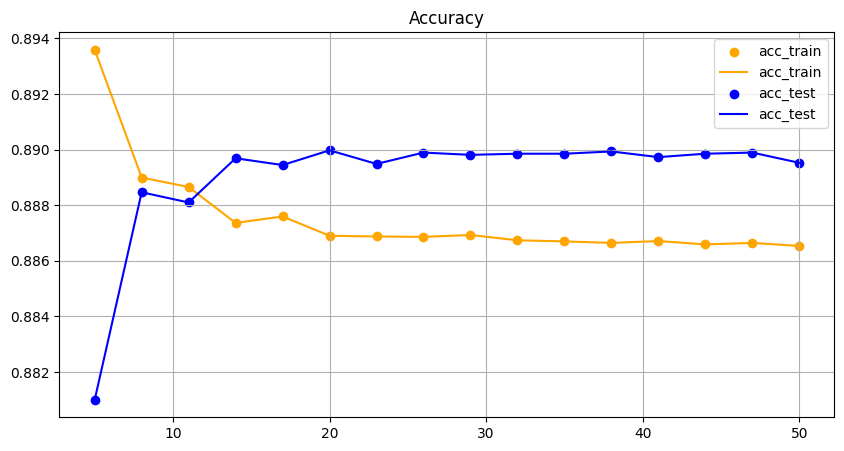

In [139]:
fig = plt.figure(figsize=(10, 5))

plt.title('Accuracy')
plt.scatter(list(k_values)[::-1], acc_train[::-1], color='orange', label='acc_train')
plt.plot(list(k_values)[::-1], acc_train[::-1], color='orange', label='acc_train')

plt.scatter(list(k_values)[::-1], acc_test[::-1], color='blue', label='acc_test')
plt.plot(list(k_values)[::-1], acc_test[::-1], color='blue', label='acc_test')

plt.grid()
plt.legend()

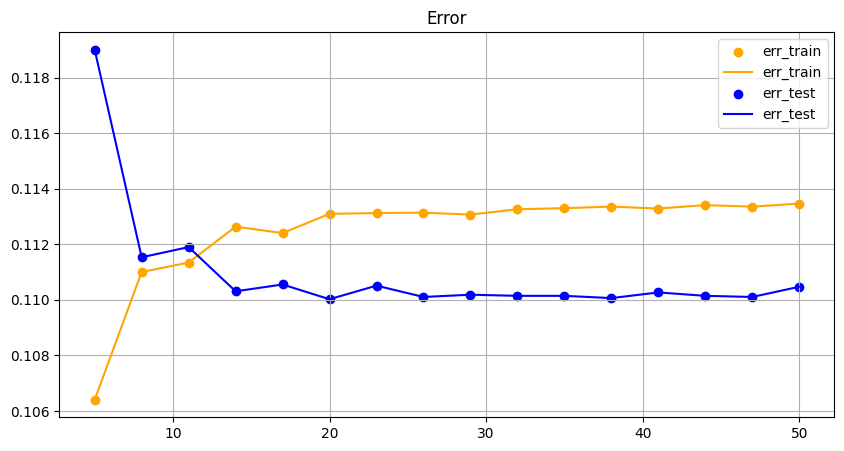

In [140]:
fig = plt.figure(figsize=(10, 5))

plt.title('Error')
plt.scatter(list(k_values)[::-1], err_train[::-1], color='orange', label='err_train')
plt.plot(list(k_values)[::-1], err_train[::-1], color='orange', label='err_train')

plt.scatter(list(k_values)[::-1], err_test[::-1], color='blue', label='err_test')
plt.plot(list(k_values)[::-1], err_test[::-1], color='blue', label='err_test')

plt.grid()
plt.legend()

При k=20 получена наилучшая точность, но разница не очень велика. 88-89% - уровень, на котором держится точность. Сравним с другими типами классификаторов.
## метод KNN для сбалансированных данных

Обучим KNN-классификатор по умолчанию (для k = 5):

In [141]:
knn_model_bal = KNeighborsClassifier()
knn_model_bal.fit(X_train_bal, y_train_bal)

KNeighborsClassifier()

ошибка на сбалансированной тренировочной выборке:

In [142]:
%%time
y_train_pred = knn_model_bal.predict(X_train_bal)
print('Accuracy score on train data: {:.2f}%'.format(100 * accuracy_score(y_train_bal, y_train_pred)))
print('         Error on train data: {:.2f}%'.format(100 * np.mean(y_train_bal != y_train_pred)))

Accuracy score on train data: 82.98%
         Error on train data: 17.02%
CPU times: total: 9.08 s
Wall time: 2.45 s


ошибка на сбалансированной тестовой выборке:

In [143]:
%%time
y_test_pred = knn_model_bal.predict(X_test)
print('Accuracy score on test data:  {:.2f}%'.format(100 * accuracy_score(y_test,  y_test_pred)))
print('         Error on test data:  {:.2f}%'.format(100 * np.mean(y_test != y_test_pred)))

Accuracy score on test data:  69.39%
         Error on test data:  30.61%
CPU times: total: 7.48 s
Wall time: 2.12 s


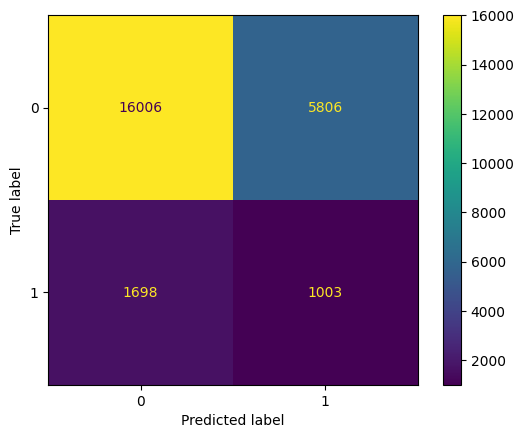

In [146]:
import pylab as pl
cm=confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=knn_model_bal.classes_)
disp.plot()

plt.show()

Удалось уменьшить ошибки второго рода (человек болен, но предсказано, что здоров), т.е. увеличить мощность нашего метода и увеличить число верно отрицательных предсказаний. Значение accuracy снизилось, что было предсказуемо, так как модель предполагала, что состояние "здоров" является типичным из-за большого количества примеров несбалансированных данных. Поэтому в случае "непонятной ситуации" модель выбирала вариант "здоров" (но медик мне подтвердил, что некоторые врачи работают так же. Не баг, а фича? :) )

# Алгоритм Random Forest
## Для оригинальных данных
Обучим классификатор на основе алгоритма Random Forest


In [147]:
%%time

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=500)
rf_model.fit(X_train, y_train)

CPU times: total: 1min 7s
Wall time: 1min 12s


RandomForestClassifier(n_estimators=500)

ошибка на тренировочной выборке:

In [148]:
%%time
y_train_pred = rf_model.predict(X_train)
print('Accuracy score on train data: {:.2f}%'.format(100 * accuracy_score(y_train, y_train_pred)))
print('         Error on train data: {:.2f}%'.format(100 * np.mean(y_train != y_train_pred)))

Accuracy score on train data: 100.00%
         Error on train data: 0.00%
CPU times: total: 9.11 s
Wall time: 9.46 s


ошибка на тестовой выборке:

In [149]:
%%time
y_test_pred = rf_model.predict(X_test)
print('Accuracy score on test  data: {:.2f}%'.format(100 * accuracy_score(y_test,  y_test_pred)))
print('         Error on test  data: {:.2f}%'.format(100 * np.mean(y_test != y_test_pred)))

Accuracy score on test  data: 88.97%
         Error on test  data: 11.03%
CPU times: total: 2.95 s
Wall time: 3.07 s


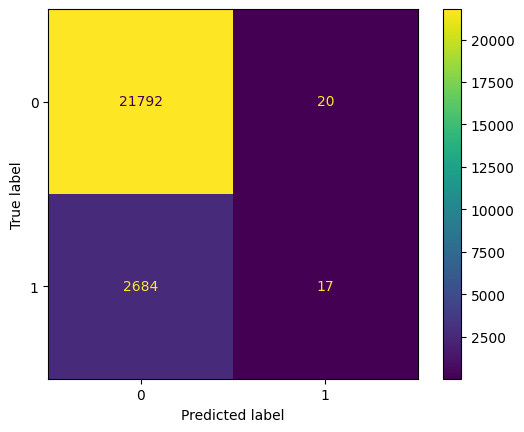

In [150]:
import pylab as pl
cm=confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=rf_model.classes_)
disp.plot()

plt.show()

Из-за несбалансированности классов опять результат работы низкий. Использвоание алгоритма Random Forest не улучшило результаты

In [151]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

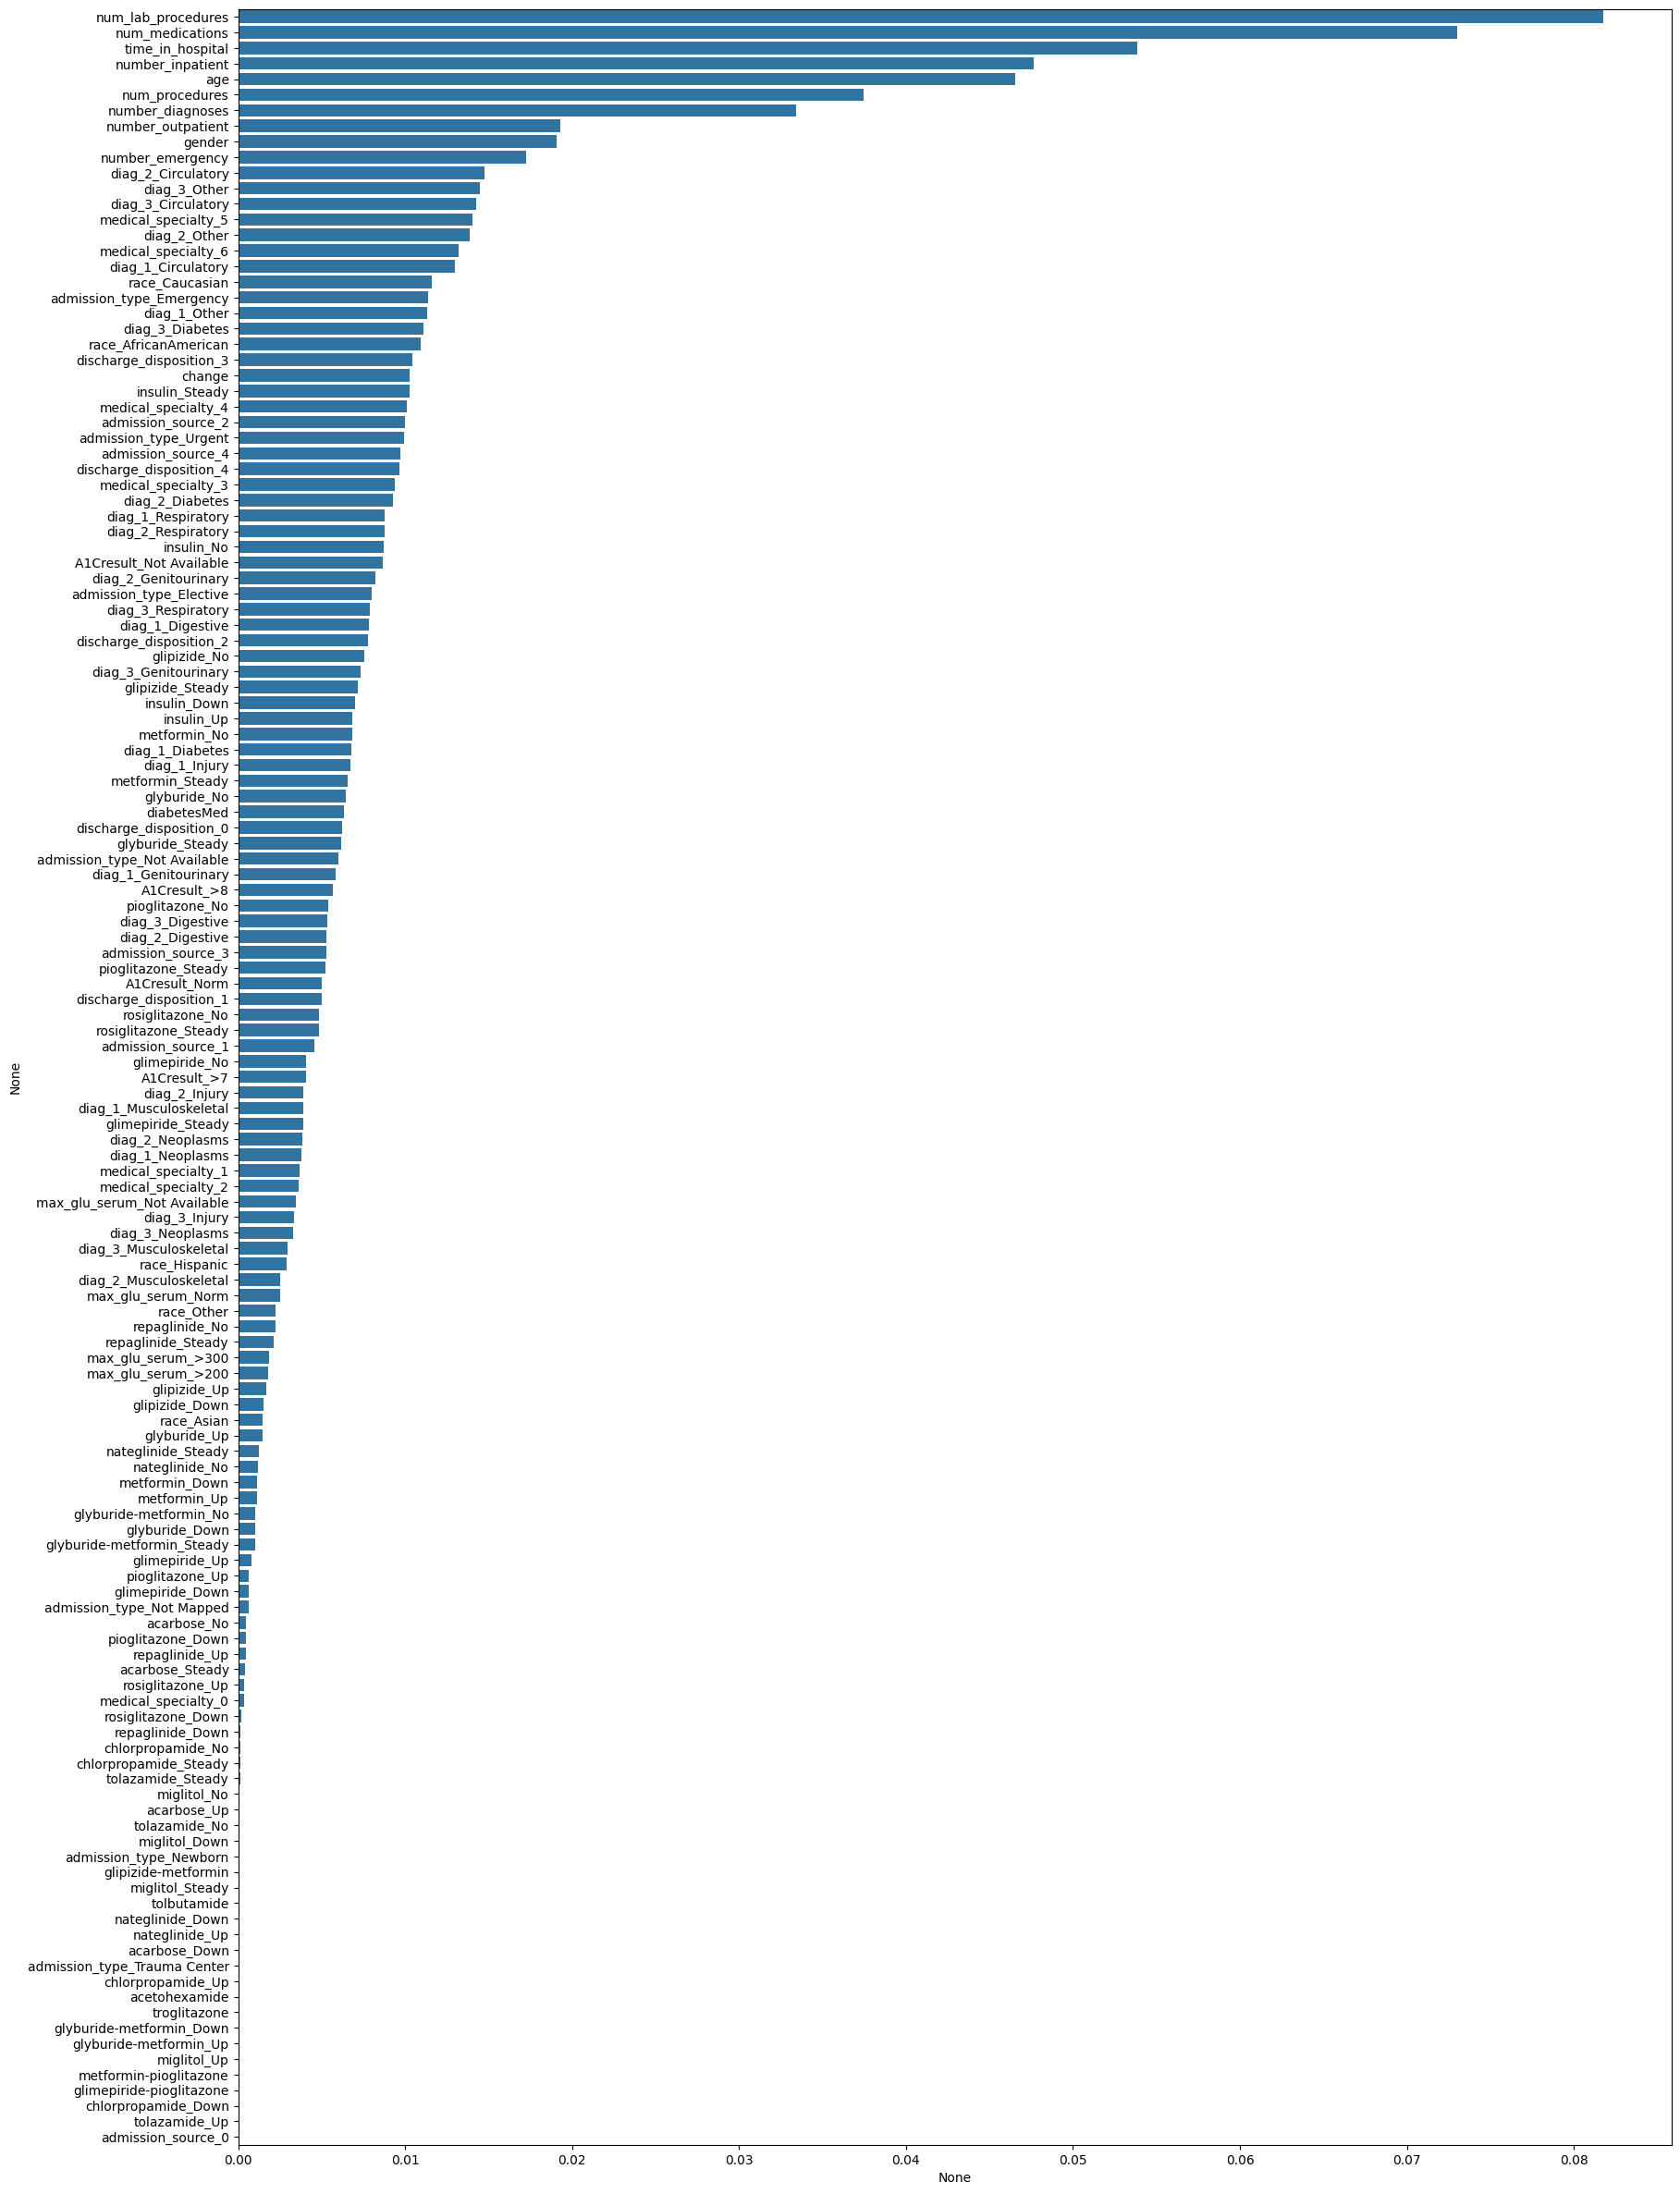

In [153]:
fig = plt.figure(figsize=(20, 30))
sns.barplot(y=importances.index, x=importances, orient='h')
pass

## Для сбалансированных данных
обучим классификатор на основе алгоритма Random Forest

In [154]:
%%time
rf_model_bal = RandomForestClassifier(n_estimators=500)
rf_model_bal.fit(X_train_bal, y_train_bal)

CPU times: total: 32.4 s
Wall time: 33.7 s


RandomForestClassifier(n_estimators=500)

ошибка на сбалансированной тренировочной выборке

In [155]:
%%time
y_train_pred = rf_model_bal.predict(X_train_bal)
print('Accuracy score on train data: {:.2f}%'.format(100 * accuracy_score(y_train_bal, y_train_pred)))
print('         Error on train data: {:.2f}%'.format(100 * np.mean(y_train_bal != y_train_pred)))

Accuracy score on train data: 100.00%
         Error on train data: 0.00%
CPU times: total: 3.3 s
Wall time: 3.43 s


ошибка на сбалансированной тестовой выборке

In [156]:
%%time
y_test_pred = rf_model_bal.predict(X_test)
print('Accuracy score on test  data: {:.2f}%'.format(100 * accuracy_score(y_test,  y_test_pred)))
print('         Error on test  data: {:.2f}%'.format(100 * np.mean(y_test != y_test_pred)))

Accuracy score on test  data: 83.43%
         Error on test  data: 16.57%
CPU times: total: 2.81 s
Wall time: 2.97 s


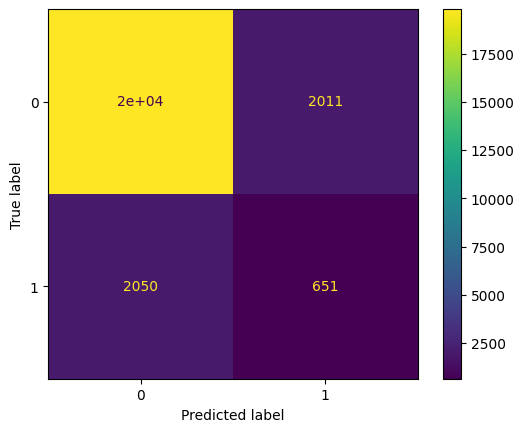

In [157]:
import pylab as pl
cm=confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=rf_model_bal.classes_)
disp.plot()

plt.show()

Замена оригинальных данных на сбалансированные для Random Forest дала такой же эффект, как аналогичная замена для KNN. Но результаты хуже, чем при использваонии метода ближайших соседей (да, мне проще не переключать раскладку... )

In [158]:
importances = pd.Series(rf_model_bal.feature_importances_, index=X.columns).sort_values(ascending=False)

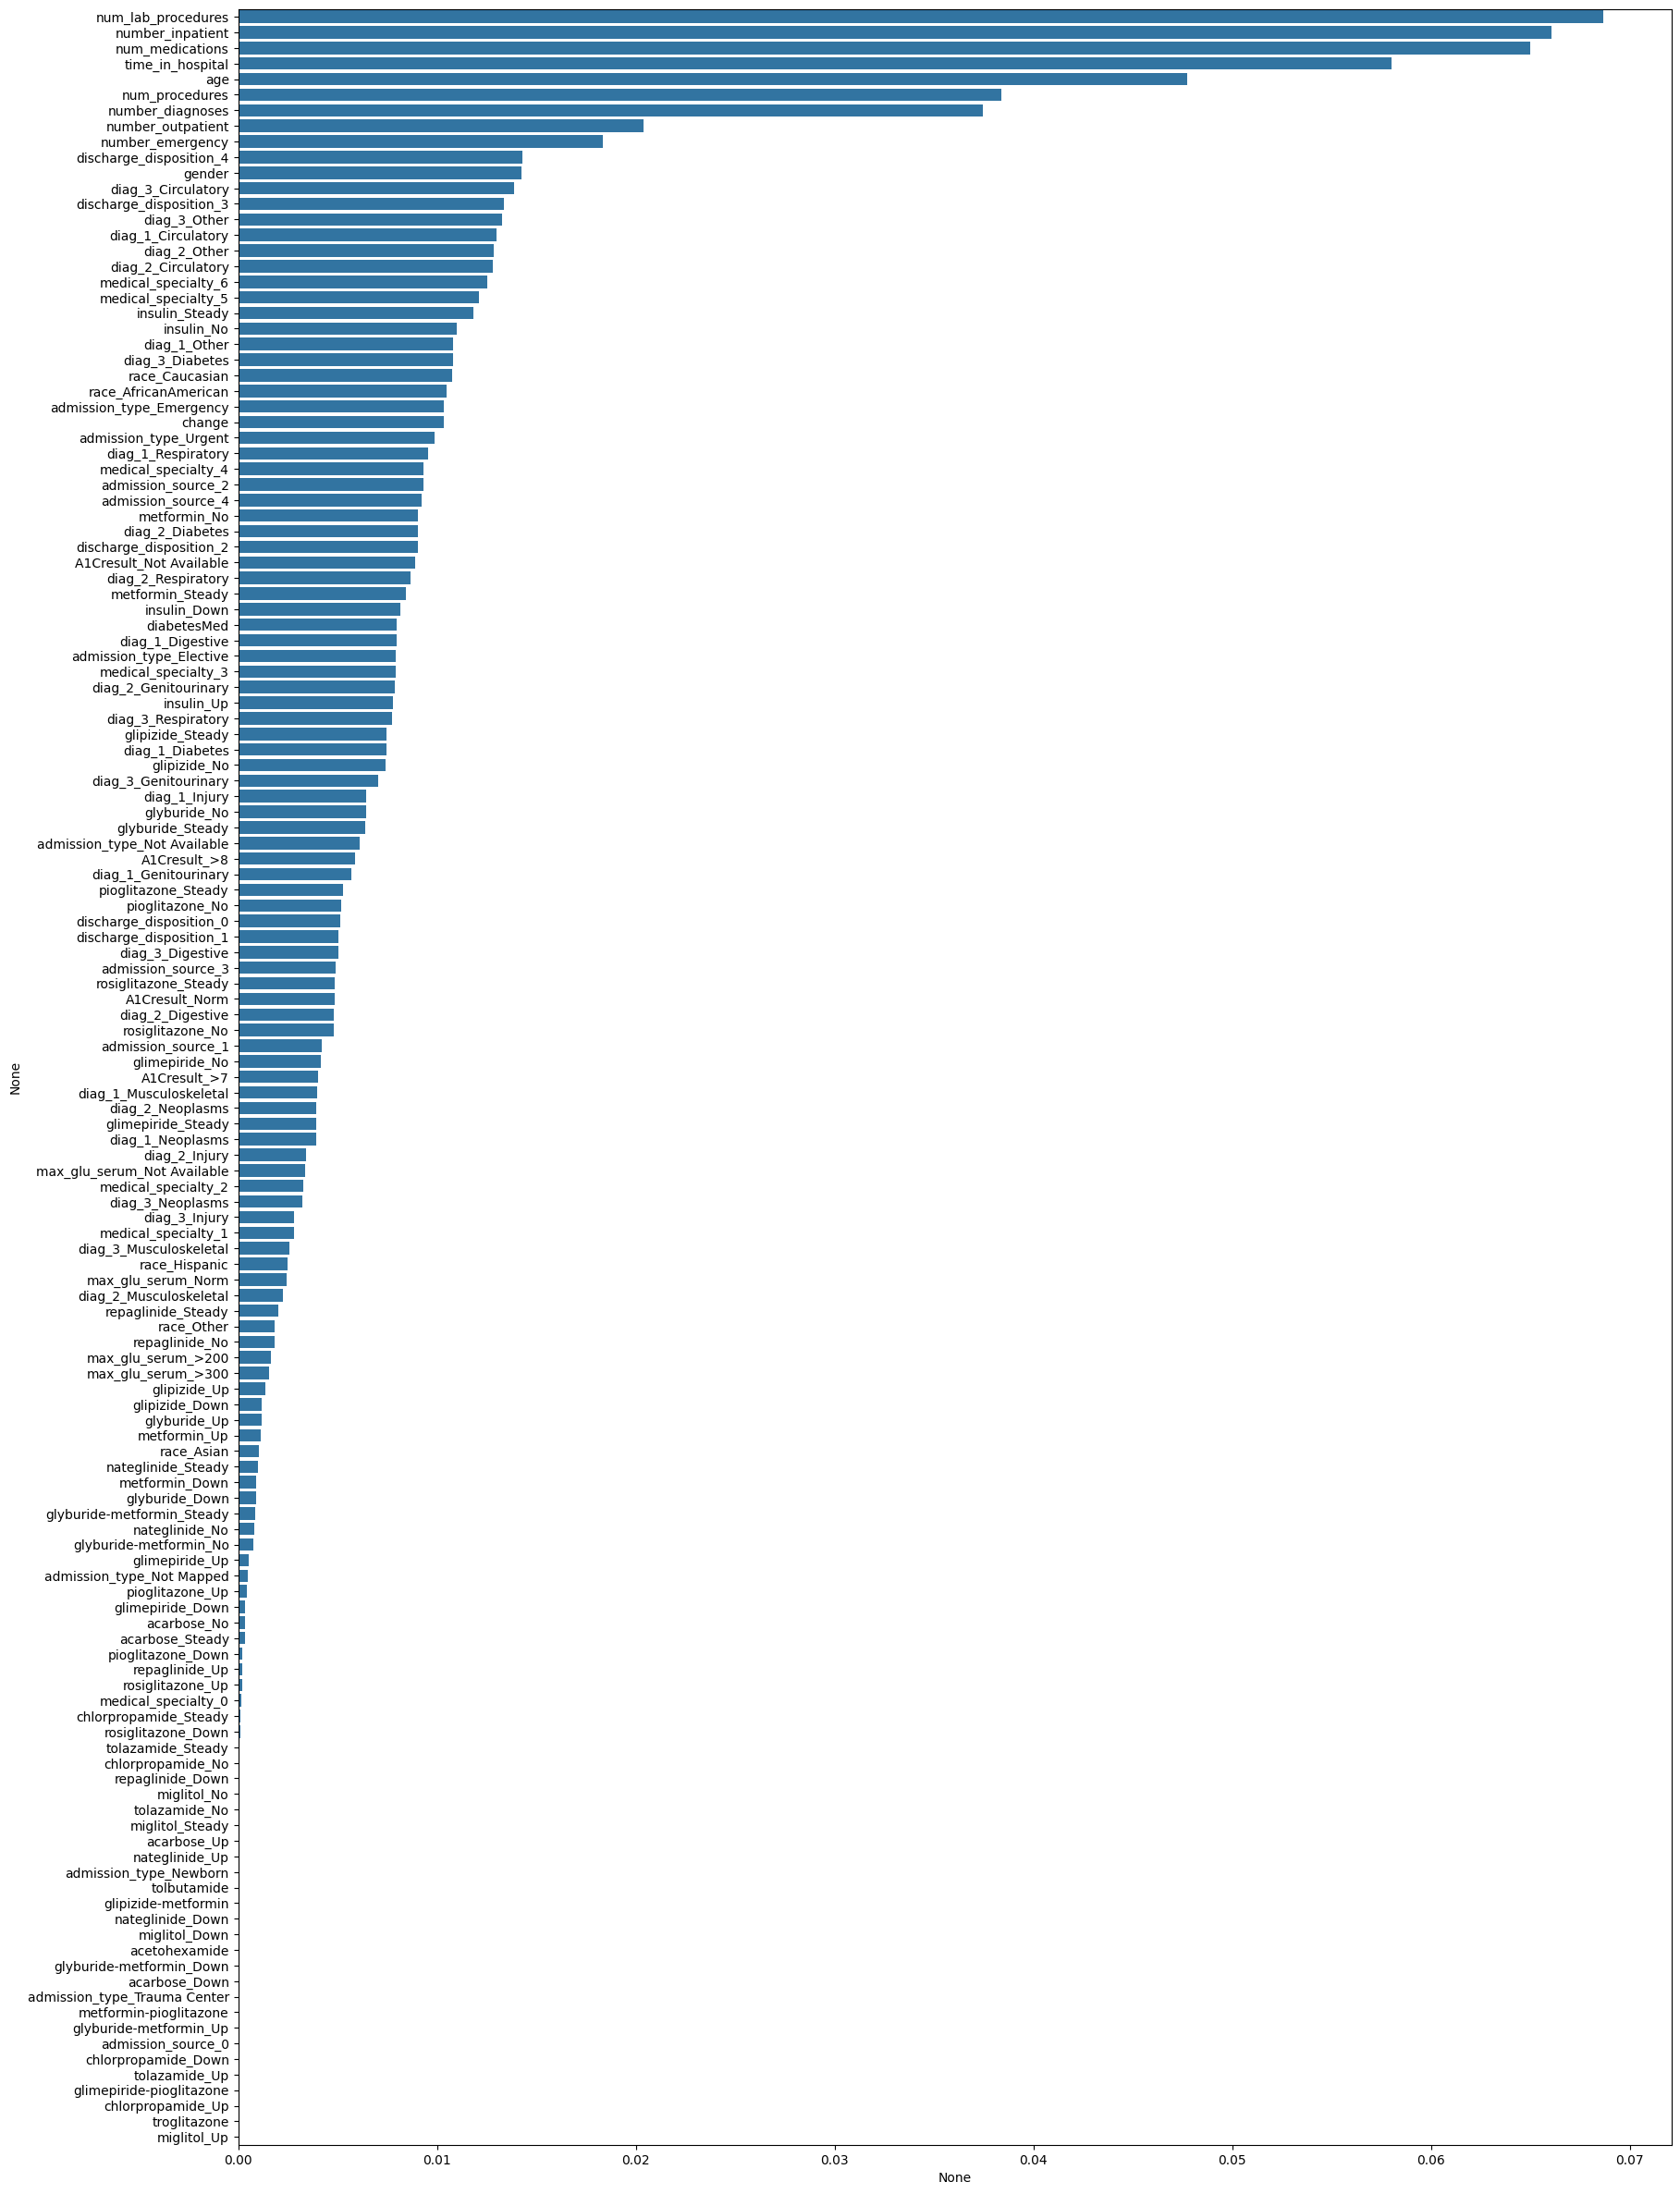

In [159]:
fig = plt.figure(figsize=(20, 30))
sns.barplot(y=importances.index, x=importances, orient='h')
pass

# Алгоритм Logistic Regression
## Для оригинальных данных
Обучим классификатор на основе алгоритма Logistic Regression

In [160]:
%%time

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='newton-cg')
lr_model.fit(X_train, y_train)

CPU times: total: 13.7 s
Wall time: 13.2 s


LogisticRegression(solver='newton-cg')

ошибка на тренировочной выборке

In [161]:
y_train_pred = lr_model.predict(X_train)
print('Accuracy score on train data: {:.2f}%'.format(100 * accuracy_score(y_train, y_train_pred)))
print('         Error on train data: {:.2f}%'.format(100 * np.mean(y_train != y_train_pred)))

Accuracy score on train data: 88.62%
         Error on train data: 11.38%


ошибка на тестовой выборке

In [162]:
y_test_pred = lr_model.predict(X_test)
print('Accuracy score on test  data: {:.2f}%'.format(100 * accuracy_score(y_test,  y_test_pred)))
print('         Error on test  data: {:.2f}%'.format(100 * np.mean(y_test != y_test_pred)))

Accuracy score on test  data: 88.90%
         Error on test  data: 11.10%


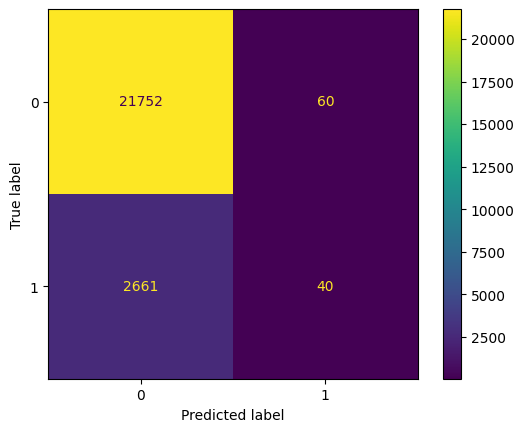

In [163]:
import pylab as pl
cm=confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=lr_model.classes_)
disp.plot()

plt.show()

(Вывод? Как обычно.)

Использвоание алгоритма не улучшило результаты, они так же далеки  от желаемого

## Для сбалансированных данных
Обучим классификатор на основе алгоритма Logistic Regression

In [164]:
%%time
lr_model_bal = LogisticRegression(solver='newton-cg')
lr_model_bal.fit(X_train_bal, y_train_bal)

CPU times: total: 4.41 s
Wall time: 5.25 s


LogisticRegression(solver='newton-cg')

ошибка на сбалансированной тренировочной выборке

In [165]:
y_train_pred = lr_model_bal.predict(X_train_bal)
print('Accuracy score on train data: {:.2f}%'.format(100 * accuracy_score(y_train_bal, y_train_pred)))
print('         Error on train data: {:.2f}%'.format(100 * np.mean(y_train_bal != y_train_pred)))

Accuracy score on train data: 72.78%
         Error on train data: 27.22%


ошибка на сбалансированной тестовой выборке


In [166]:
y_test_pred = lr_model_bal.predict(X_test)
print('Accuracy score on test  data: {:.2f}%'.format(100 * accuracy_score(y_test,  y_test_pred)))
print('         Error on test  data: {:.2f}%'.format(100 * np.mean(y_test != y_test_pred)))

Accuracy score on test  data: 84.49%
         Error on test  data: 15.51%


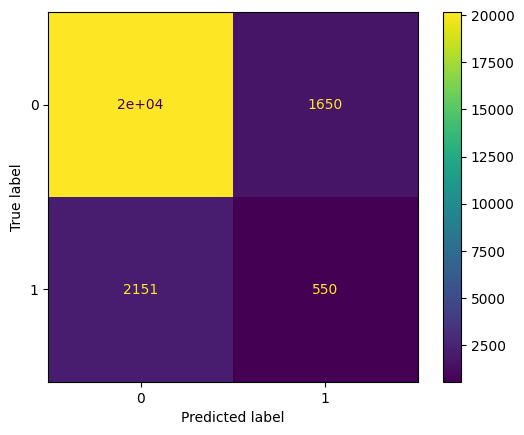

In [167]:
import pylab as pl
cm=confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=lr_model_bal.classes_)
disp.plot()

plt.show()

Замена оригинальных данных на сбалансированые дала аналогиченый эффект, как при использвоании предыдущих методов. Результаты схожи с результатами, выданными при использовании Random Forest, но далеки от тех, что были получены при использовании метода ближайшего соседа. Использование алгоритма Logistic Regression не улучшило результаты

# Промежуточные выводы

* Лучшая точность (accuracy), которой удалось добиться на тестовой выборке - 89% достигнута методом _kNN_ при _k = 20_.
* Ни один из других предложенных алгоритмов не смог добиться лучших результатов.
* По матрицам рассогласования для обученных на оригинальных данных моделей можно сказать, что у всех из них довольно велико значение ошибки второго рода, что опасно в нашем случае, так как это медицинские данные
* Использование сбалансированных данных вместо оригинальных улучшило некоторые показатели, но в ущерб другим. Если же говорить только об ошибке второго рода, то подобная замена во всех рассматриваемых случаях снижает её на определённый процент от первоначального уровня
* Метод ближайших соседей по времени работает сильно дольше остальных методов.

# Neural Networks
## Cеть с одним скрытым слоем
### Для оригинальных данных

In [169]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(
    hidden_layer_sizes=(100,),
    solver='adam',
    activation='relu',
    random_state=42,
    max_iter=1000
)

In [170]:
%%time
mlp_model.fit(X_train, y_train)

CPU times: total: 34.6 s
Wall time: 2min 25s


MLPClassifier(max_iter=1000, random_state=42)

ошибка на тренировочной выборке

In [171]:
y_train_pred = mlp_model.predict(X_train)
print('Accuracy score on train data: {:.2f}%'.format(100 * accuracy_score(y_train, y_train_pred)))
print('         Error on train data: {:.2f}%'.format(100 * np.mean(y_train != y_train_pred)))

Accuracy score on train data: 91.66%
         Error on train data: 8.34%


ошибка на тестовой выборке

In [172]:
y_test_pred = mlp_model.predict(X_test)
print('Accuracy score on test  data: {:.2f}%'.format(100 * accuracy_score(y_test,  y_test_pred)))
print('         Error on test  data: {:.2f}%'.format(100 * np.mean(y_test != y_test_pred)))

Accuracy score on test  data: 84.65%
         Error on test  data: 15.35%


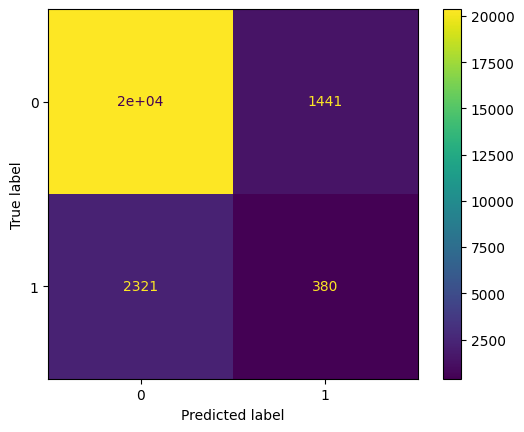

In [173]:
import pylab as pl
cm=confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=mlp_model.classes_)
disp.plot()

plt.show()

Несбалансированность опять вставила палки в колеса. Попробуем на сбалансированных данных
### Для сбалансированных данных

In [174]:
mlp_model_bal = MLPClassifier(
    hidden_layer_sizes=(100,),
    solver='adam',
    activation='relu',
    random_state=42,
    max_iter=1000
)

In [175]:
%%time
mlp_model_bal.fit(X_train_bal, y_train_bal)

CPU times: total: 17.9 s
Wall time: 1min 13s


MLPClassifier(max_iter=1000, random_state=42)

In [ ]:
ошибка на сбалансированной тренировочной выборке

In [176]:
y_train_pred = mlp_model_bal.predict(X_train_bal)
print('Accuracy score on train data: {:.2f}%'.format(100 * accuracy_score(y_train_bal, y_train_pred)))
print('         Error on train data: {:.2f}%'.format(100 * np.mean(y_train_bal != y_train_pred)))

Accuracy score on train data: 88.86%
         Error on train data: 11.14%


ошибку на сбалансированной тестовой выборке

In [177]:
y_test_pred = mlp_model_bal.predict(X_test)
print('Accuracy score on test  data: {:.2f}%'.format(100 * accuracy_score(y_test,  y_test_pred)))
print('         Error on test  data: {:.2f}%'.format(100 * np.mean(y_test != y_test_pred)))

Accuracy score on test  data: 67.74%
         Error on test  data: 32.26%


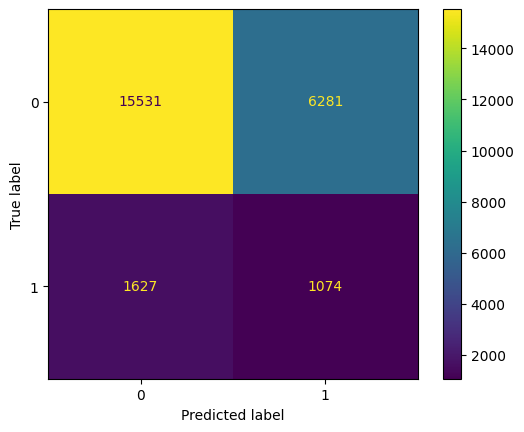

In [178]:
import pylab as pl
cm=confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=mlp_model_bal.classes_)
disp.plot()

plt.show()

Ожидаемо, замена оригинальных данных на сбалансированные привела к снижению ошибки второго рода на примерно 40%. Однако, это существенно увеличило количество "ложных срабатываний" (ошибку первого рода), что негативно повлияло на показатель точности (accuracy).
## Cеть с двумя скрытыми слоями
### Для оригинальных данных

In [179]:
mlp_model = MLPClassifier(
    hidden_layer_sizes=(10, 10),
    solver='adam',
    activation='relu',
    random_state=42,
    max_iter=1000
)

In [180]:
%%time
mlp_model.fit(X_train, y_train)

CPU times: total: 5.64 s
Wall time: 34.7 s


MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

ошибка на тренировочной выборке и на тестовой выборке

In [181]:
y_train_pred = mlp_model.predict(X_train)
print('Accuracy score on train data: {:.2f}%'.format(100 * accuracy_score(y_train, y_train_pred)))
print('         Error on train data: {:.2f}%'.format(100 * np.mean(y_train != y_train_pred)))

Accuracy score on train data: 88.80%
         Error on train data: 11.20%


In [182]:
y_test_pred = mlp_model.predict(X_test)
print('Accuracy score on test  data: {:.2f}%'.format(100 * accuracy_score(y_test,  y_test_pred)))
print('         Error on test  data: {:.2f}%'.format(100 * np.mean(y_test != y_test_pred)))

Accuracy score on test  data: 88.73%
         Error on test  data: 11.27%


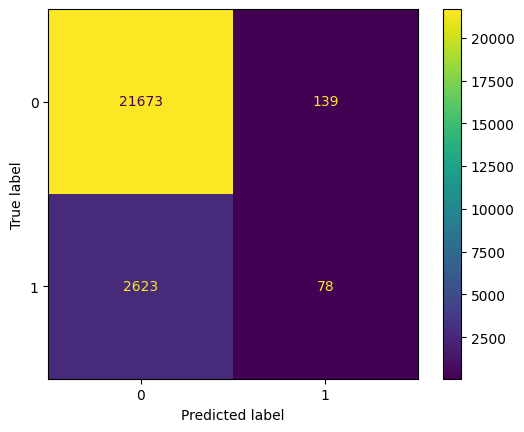

In [183]:
import pylab as pl
cm=confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=mlp_model.classes_)
disp.plot()

plt.show()

Несбалансированность опять вставила палки в колеса. Попробуем на сбалансированных данных
### Для сбалансированных данных

In [184]:
mlp_model_bal = MLPClassifier(
    hidden_layer_sizes=(10, 10),
    solver='adam',
    activation='relu',
    random_state=42,
    max_iter=1000
)

In [185]:
%%time
mlp_model_bal.fit(X_train_bal, y_train_bal)

CPU times: total: 3.62 s
Wall time: 13.8 s


MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

ошибка на сбалансированных тренировочной и тестовой выборках

In [186]:
y_train_pred = mlp_model_bal.predict(X_train_bal)
print('Accuracy score on train data: {:.2f}%'.format(100 * accuracy_score(y_train_bal, y_train_pred)))
print('         Error on train data: {:.2f}%'.format(100 * np.mean(y_train_bal != y_train_pred)))

Accuracy score on train data: 74.88%
         Error on train data: 25.12%


In [187]:
y_test_pred = mlp_model_bal.predict(X_test)
print('Accuracy score on test  data: {:.2f}%'.format(100 * accuracy_score(y_test,  y_test_pred)))
print('         Error on test  data: {:.2f}%'.format(100 * np.mean(y_test != y_test_pred)))

Accuracy score on test  data: 79.84%
         Error on test  data: 20.16%


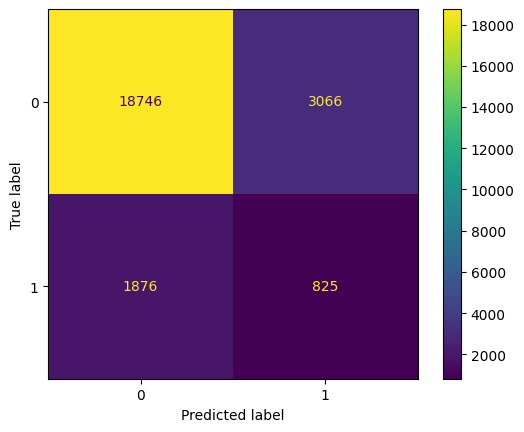

In [188]:
import pylab as pl
cm=confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=mlp_model_bal.classes_)
disp.plot()

plt.show()

Результат в целом стал хуже. Лучше использовать сеть с одним скрытым слоем, чем с двумя.

# Оптимизация гиперпараметров
## Поиск оптимальных значений для alpha и n\_layers
Подбираем оптимальное значение параметра alpha варьируя его в диапазоне от -3 до 2 разделённом равномерно в логарифмическом масштабе. Подбираем оптимальное количество нейронов в скрытом слое в диапазоне от 10 до 139 с шагом 5.

In [189]:
alpha_arr = np.logspace(-3, 2, 11)
hidden_layer_sizes_arr = [(n,) for n in range (10, 140, 5)]

In [190]:
%%time
results_train_acc = []
results_train_err = []
results_test_acc = []
results_test_err = []
hyper_params = []

for layer_sizes in hidden_layer_sizes_arr:
    for alpha_value in alpha_arr:
        mlp_model = MLPClassifier(
            hidden_layer_sizes=layer_sizes,
            alpha=alpha_value,
            solver='adam',
            activation='relu',
            random_state=42,
            max_iter=1000
        )
        mlp_model.fit(X_train, y_train)
        y_train_pred = mlp_model.predict(X_train)
        acc_train = 100 * accuracy_score(y_train, y_train_pred)
        err_train = 100 * np.mean(y_train != y_train_pred)
        y_test_pred = mlp_model.predict(X_test)
        acc_test = 100 * accuracy_score(y_test,  y_test_pred)
        err_test = 100 * np.mean(y_test != y_test_pred)
        print("[alpha={:.4f}; layer={}]: acc_train={:.2f}%   acc_test={:.2f}%".format(
            alpha_value,
            layer_sizes,
            acc_train,
            acc_test
        ))
        hyper_params.append({'hidden_layer_sizes': layer_sizes, 'alpha': alpha_value})
        results_train_acc.append(acc_train)
        results_train_err.append(err_train)
        results_test_acc.append(acc_test)
        results_test_err.append(err_test)

[alpha=0.0010; layer=(10,)]: acc_train=88.79%   acc_test=88.94%
[alpha=0.0032; layer=(10,)]: acc_train=88.74%   acc_test=88.99%
[alpha=0.0100; layer=(10,)]: acc_train=88.74%   acc_test=88.96%
[alpha=0.0316; layer=(10,)]: acc_train=88.72%   acc_test=88.94%
[alpha=0.1000; layer=(10,)]: acc_train=88.67%   acc_test=88.97%
[alpha=0.3162; layer=(10,)]: acc_train=88.65%   acc_test=88.98%
[alpha=1.0000; layer=(10,)]: acc_train=88.62%   acc_test=88.98%
[alpha=3.1623; layer=(10,)]: acc_train=88.63%   acc_test=88.98%
[alpha=10.0000; layer=(10,)]: acc_train=88.63%   acc_test=88.98%
[alpha=31.6228; layer=(10,)]: acc_train=88.63%   acc_test=88.98%
[alpha=100.0000; layer=(10,)]: acc_train=88.63%   acc_test=88.98%
[alpha=0.0010; layer=(15,)]: acc_train=88.84%   acc_test=88.93%
[alpha=0.0032; layer=(15,)]: acc_train=88.85%   acc_test=88.96%
[alpha=0.0100; layer=(15,)]: acc_train=88.80%   acc_test=88.90%
[alpha=0.0316; layer=(15,)]: acc_train=88.75%   acc_test=89.03%
[alpha=0.1000; layer=(15,)]: acc_tra

(вероятно брать шаг в 5 было большой ошибкой)

In [191]:
arg_max = np.argmax(results_test_acc)
arg_max_params = hyper_params[arg_max]

Оптимальные значения числа нейронов в скрытом слое и alpha, а также значения точности для тренировочного и тестового наборов:

In [192]:
arg_max_params, results_train_acc[arg_max], results_test_acc[arg_max]

({'hidden_layer_sizes': (15,), 'alpha': 0.03162277660168379},
 88.74882715293926,
 89.03031044751765)

In [193]:
alpha_arr = []
train_acc_arr = []
test_acc_arr = []
train_err_arr = []
test_err_arr = []

for i, params in enumerate(hyper_params):
    if (params['hidden_layer_sizes'] == arg_max_params['hidden_layer_sizes']):
        train_acc_arr.append(results_train_acc[i])
        test_acc_arr.append(results_test_acc[i])
        train_err_arr.append(results_train_err[i])
        test_err_arr.append(results_test_err[i])
        alpha_arr.append(params['alpha'])

In [194]:
def plot_acc_vs_alpha(alpha_arr, train_acc, test_acc):
    plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
    plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
    plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
    plt.title('Accuracy vs. alpha')
    plt.xlabel('alpha')
    plt.ylabel('Accuracy')
    plt.legend()

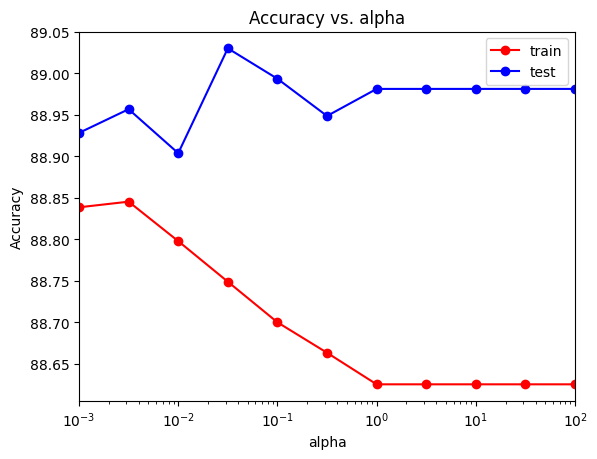

In [195]:
plot_acc_vs_alpha(alpha_arr, train_acc_arr, test_acc_arr)

In [196]:
def plot_err_vs_alpha(alpha_arr, train_err, test_err):
    plt.semilogx(alpha_arr, train_err, 'r-o', label = 'train')
    plt.semilogx(alpha_arr, test_err, 'b-o', label = 'test')
    plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
    plt.title('Error vs. alpha')
    plt.xlabel('alpha')
    plt.ylabel('Error')
    plt.legend()

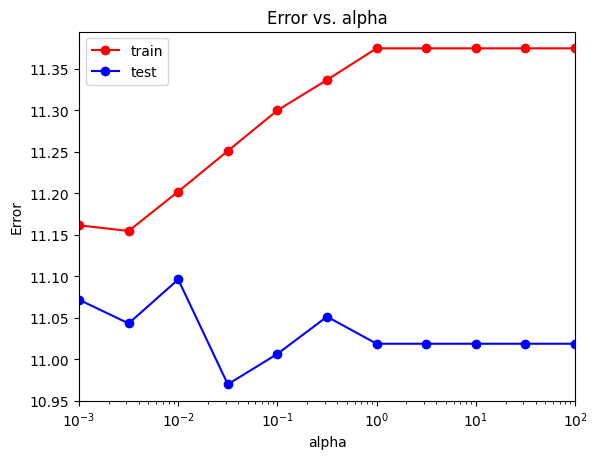

In [197]:
plot_err_vs_alpha(alpha_arr, train_err_arr, test_err_arr)

Повторно обучим MLP-классификатор с использованием найденных оптимальных гиперпараметров, а затем оценим его качество, создав матрицу рассогласования.

In [198]:
mlp_model = MLPClassifier(
    hidden_layer_sizes=arg_max_params['hidden_layer_sizes'],
    alpha=arg_max_params['alpha'],
    solver='adam',
    activation='relu',
    random_state=42,
    max_iter=1000
)

In [199]:
%%time
mlp_model.fit(X_train, y_train)

CPU times: total: 2.78 s
Wall time: 14.1 s


MLPClassifier(alpha=0.03162277660168379, hidden_layer_sizes=(15,),
              max_iter=1000, random_state=42)

ошибка на тренировочной выборке

In [200]:
y_train_pred = mlp_model.predict(X_train)
print('Accuracy score on train data: {:.2f}%'.format(100 * accuracy_score(y_train, y_train_pred)))
print('         Error on train data: {:.2f}%'.format(100 * np.mean(y_train != y_train_pred)))

Accuracy score on train data: 88.75%
         Error on train data: 11.25%


ошибка на тестовой выборке

In [201]:
y_test_pred = mlp_model.predict(X_test)
print('Accuracy score on test  data: {:.2f}%'.format(100 * accuracy_score(y_test,  y_test_pred)))
print('         Error on test  data: {:.2f}%'.format(100 * np.mean(y_test != y_test_pred)))

Accuracy score on test  data: 89.03%
         Error on test  data: 10.97%


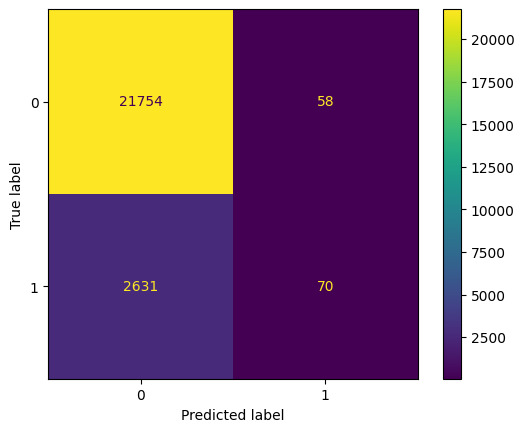

In [202]:
import pylab as pl
cm=confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=mlp_model.classes_)
disp.plot()

plt.show()

Исходя из матрицы рассогласования, становится очевидным, что из-за ytc,несбалансированности классов качество работы нашей обученной модели с оптимальными гиперпараметрами все так же оставляет желать лучшего

In [205]:
mlp_model_bal = MLPClassifier(
    hidden_layer_sizes=arg_max_params['hidden_layer_sizes'],
    alpha=arg_max_params['alpha'],
    solver='adam',
    activation='relu',
    random_state=42,
    max_iter=1000
)

In [206]:
%%time
mlp_model_bal.fit(X_train_bal, y_train_bal)

CPU times: total: 1.31 s
Wall time: 12.2 s


MLPClassifier(alpha=0.03162277660168379, hidden_layer_sizes=(15,),
              max_iter=1000, random_state=42)

In [207]:
y_train_pred = mlp_model_bal.predict(X_train_bal)
print('Accuracy score on train data: {:.2f}%'.format(100 * accuracy_score(y_train_bal, y_train_pred)))
print('         Error on train data: {:.2f}%'.format(100 * np.mean(y_train_bal != y_train_pred)))

Accuracy score on train data: 75.07%
         Error on train data: 24.93%


In [208]:
y_test_pred = mlp_model_bal.predict(X_test)
print('Accuracy score on test  data: {:.2f}%'.format(100 * accuracy_score(y_test,  y_test_pred)))
print('         Error on test  data: {:.2f}%'.format(100 * np.mean(y_test != y_test_pred)))

Accuracy score on test  data: 83.35%
         Error on test  data: 16.65%


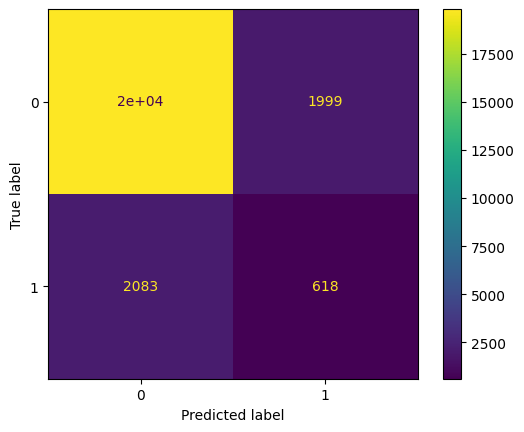

In [210]:
import pylab as pl
cm=confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=mlp_model_bal.classes_)
disp.plot()

plt.show()

# Выводы

* Благодаря подбору оптимальных значений гиперпараметров удалось улучшить точность на тестовой выборке.
* ЛMLP показал лучшие результаты по точности (89.03%) при использовании alpha=0.03162277660168379 и 15 нейронов в скрытом слое.
* Применение MLP классификатора не привело к значительному повышению точности по сравнению с другими классификаторами (лучший показатель точности для KNN - 89.00%, для MLP - 89.03%).
* Все используемые алгоритмы показывают примерно одинаковую лучшую точность предсказания на тестовой выборке для моделей, обученных на оригинальных данных.
* Использование сбалансированных данных вместо оригинальных привело к улучшению некоторых показателей, но снизило другие. Если рассматривать только ошибку второго рода, то замена данных сбалансированными приводит к ее снижению во всех рассматриваемых случаях.
* Метод MLP по времени работает сильно дольше остальных методов. По этому показателю сравним лишь с KNN.